# Data Cleaning

In [1]:
# Import Library 

import re
from re import search

import unicodedata
from bs4 import BeautifulSoup
from bs4 import Tag 

from bs4 import NavigableString
from bs4 import SoupStrainer
from pprint import pprint

import numpy as np
from numpy import array
import pandas as pd 

from itertools import groupby
from operator import itemgetter

import csv
import pickle

from collections import Counter
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from IPython.core import display as ICD
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', None)

In [2]:
company_name = {'Tesla' : '0001318605',
                'Microsoft': '0000789019',
                'Apple' : '0000320193',
               'Netflix': '0001065280',
               'Facebook' : '0001326801',
               'Google' : '1652044',
               'Ford' : '0000037996',
               'Amazon' : '0001018724',
                'GM' : '0001467858'}

In [3]:
dfs = []
for name, CIK in company_name.items(): 
    company_df = pd.read_csv(f'C:/Users/Matthew/Documents/Machine Learning Accelerator/Capstone Project/1 Predict Stock Price/{name}/abt-{name}.csv')
    print(name)
    company_df['company_name'] = '{}'.format(name)
    print(company_df.shape)
    ICD.display(company_df)
    dfs.append(company_df)
    print()


Tesla
(22, 38)


Quarter  Year        Cash  Accounts Receivable   Inventory  \
0       Q1  2020  8080000000           1274000000  4494000000   
1       Q3  2019  5338000000           1128000000  3581000000   
2       Q2  2019  4954740000           1147100000  3382358000   
3       Q1  2019  2198169000           1046945000  3836850000   
4       Q3  2018  2967504000           1155001000  3314127000   
5       Q2  2018  2236424000            569874000  3324643000   
6       Q1  2018  2665673000            652848000  2565826000   
7       Q3  2017  3530030000            607734000  2471382000   
8       Q2  2017  3035924000            453539000  2438111000   
9       Q1  2017  4006593000            440349000  2220336000   
10      Q3  2016  3084257000            326895000  1604571000   
11      Q2  2016  3246301000            178594000  1609607000   
12      Q1  2016  1441789000            318056000  1301961000   
13      Q3  2015  1426036000            119964000  1293717000   
14      Q2  2015  1150673000            138648000  1212279000   
15      Q1  2015  1510076000            200052000  1054840000   
16      Q4  2019  6268000000           1324000000  3552000000   
17      Q4  2018  3685618000            949022000  3113446000   
18      Q4  2017  3367914000            515381000  2263537000   
19      Q4  2016  3393216000            499142000  2067454000   
20      Q4  2015  1196908000            168965000  1277838000   
21      Q4  2014  1905713000            226604000   953675000   

    Prepaid expenses and other current assets  Total current assets  \
0                                  1045000000           14893000000   
1                                   660000000           10940000000   
2                                   569748000           10181952000   
3                                   464908000            7677822000   
4                                   325232000            7920491000   
5                                   422034000            6699797000   
6                                   379379000            6383920000   
7                                   321406000            7068733000   
8                                   313501000            6359444000   
9                                   271665000            7027889000   
10                                  132978000            5172412000   
11                                  144678000            5203705000   
12                                  153757000            3239543000   
13                                  133855000            2998795000   
14                                  106430000            2628621000   
15                                  135756000            2921417000   
16                                  713000000           12103000000   
17                                  365671000            8306308000   
18                                  268365000            6570520000   
19                                  194465000            6259796000   
20                                  125229000            2791568000   
21                                   94718000            3198657000   

    Operating lease vehicles  Solar energy systems  Property and Equipment  \
0                 2527000000          6.106000e+09             10638000000   
1                 2253000000          6.168000e+09             10190000000   
2                 2069540000          6.200704e+09             10082458000   
3                 1972502000          6.241637e+09              9850929000   
4                 2186137000          6.301537e+09             11246295000   
5                 2282047000          6.340031e+09             10969348000   
6                 2315124000          6.346374e+09             10519226000   
7                 3834234000          6.287965e+09              9394397000   
8                 3600821000          6.218504e+09              8399229000   
9                 3452595000          6.085990e+09              7016551000   
10             


Microsoft
(32, 28)


Quarter  Year         Cash  Short term investments  Accounts Receivable  \
0       Q1  2020  11710000000            125916000000          22699000000   
1       Q4  2019   8864000000            125389000000          23525000000   
2       Q3  2019  13117000000            123519000000          19087000000   
3       Q1  2019  11212000000            120406000000          19269000000   
4       Q4  2018   6638000000            121024000000          19680000000   
5       Q3  2018  15137000000            120743000000          17390000000   
6       Q1  2018   9221000000            123049000000          17208000000   
7       Q4  2017  12859000000            129921000000          18428000000   
8       Q3  2017   6884000000            131587000000          14561000000   
9       Q1  2017   6713000000            119305000000          12882000000   
10      Q4  2016   8468000000            114313000000          14343000000   
11      Q3  2016  13928000000            123004000000          11129000000   
12      Q1  2016   7170000000             98382000000          12247000000   
13      Q4  2015   7185000000             95455000000          14507000000   
14      Q3  2015   5431000000             93924000000          11444000000   
15      Q1  2015   7414000000             88024000000          12427000000   
16      Q4  2014   6426000000             83823000000          16186000000   
17      Q3  2014   6302000000             82891000000          12887000000   
18      Q1  2014  11572000000             76853000000          13497000000   
19      Q4  2013  10059000000             73885000000          15986000000   
20      Q3  2013   4023000000             76649000000          11007000000   
21      Q1  2013   5240000000             69243000000          11991000000   
22      Q4  2012   6017000000             62295000000          14317000000   
23      Q3  2012   5036000000             61608000000           9871000000   
24      Q2  2019  11356000000            122463000000          29524000000   
25      Q2  2018  11946000000            121822000000          26481000000   
26      Q2  2017   7663000000            125318000000          19792000000   
27      Q2  2016   6510000000            106730000000          18277000000   
28      Q2  2015   5595000000             90931000000          17908000000   
29      Q2  2014   8669000000             77040000000          19544000000   
30      Q2  2013   3804000000             73218000000          17486000000   
31      Q2  2012   6938000000             56102000000          15780000000   

     Inventory  Total current assets  Property and Equipment     Goodwill  \
0   1644000000          170505000000             41221000000  42064000000   
1   1823000000          167074000000             40522000000  42248000000   
2   2622000000          165896000000             38409000000  42113000000   
3   1951000000          159887000000             33648000000  41861000000   
4   1961000000          156874000000             32717000000  41577000000   
5   3614000000          164195000000             31430000000  35855000000   
6   2084000000          156659000000             27929000000  35582000000   
7   2003000000          167633000000             26304000000  35355000000   
8   3211000000          161031000000             24809000000  35389000000   
9   1979000000          146313000000             21962000000  34668000000   
10  1961000000          144949000000             21379000000  34524000000   
11  3122000000          157909000000             19224000000  17907000000   
12  2450000000          128421000000             16831000000  17948000000   
13  2702000000          127812000000             15789000000  17436000000   
14  3816000000          121656000000             15046000000  17142000000   
15  2469000000          118398000000             14375000000  21728000000   
16  2053000000          116362000000             13607000000  21855000000   
17  3141000000          112439000000      


Apple
(26, 31)


Quarter  Year         Cash  Accounts Receivable   Inventory  \
0       Q1  2020  40174000000          15722000000  3334000000   
1       Q4  2019  39771000000          20970000000  4097000000   
2       Q2  2019  50530000000          14148000000  3355000000   
3       Q1  2019  37988000000          15085000000  4884000000   
4       Q4  2018  44771000000          18077000000  4988000000   
5       Q2  2018  31971000000          14104000000  5936000000   
6       Q1  2018  45059000000          14324000000  7662000000   
7       Q4  2017  27491000000          23440000000  4421000000   
8       Q3  2017  18571000000          12399000000  3146000000   
9       Q2  2017  15157000000          11579000000  2910000000   
10      Q4  2016  16371000000          14057000000  2712000000   
11      Q2  2016  18237000000          11714000000  1831000000   
12      Q1  2016  21514000000          12229000000  2281000000   
13      Q4  2015  16689000000          12953000000  2451000000   
14      Q2  2015  15319000000          10370000000  2042000000   
15      Q1  2015  14489000000          10905000000  2396000000   
16      Q4  2014  19478000000          16709000000  2283000000   
17      Q2  2014  12977000000          10788000000  1594000000   
18      Q1  2014  18949000000           9700000000  1829000000   
19      Q4  2013  14077000000          14200000000  2122000000   
20      Q3  2019  48844000000          22926000000  4106000000   
21      Q3  2018  25913000000          23186000000  3956000000   
22      Q3  2017  20289000000          17874000000  4855000000   
23      Q3  2016  20484000000          15754000000  2132000000   
24      Q3  2015  21120000000          16849000000  2349000000   
25      Q3  2014  13844000000          17460000000  2111000000   

    Vendor non trade receivables  Other current assets  Total current assets  \
0                    14955000000           15691000000          143753000000   
1                    18976000000           12026000000          163231000000   
2                    12326000000           10530000000          134973000000   
3                    11193000000           12092000000          123346000000   
4                    18904000000           12432000000          140828000000   
5                    12263000000           12488000000          115761000000   
6                     8084000000           12043000000          130053000000   
7                    27459000000           11337000000          143810000000   
8                    10233000000           10338000000          112875000000   
9                     9033000000           11367000000          101990000000   
10                   13920000000           12191000000          103332000000   
11                    7328000000           11132000000           93761000000   
12                    7595000000           10204000000           87592000000   
13                   11668000000           11073000000           76219000000   
14                    9537000000            9291000000           70953000000   
15                    7259000000            9094000000           67891000000   
16                   13267000000           13635000000           83403000000   
17                    6053000000            7825000000           67949000000   
18                    6120000000            7528000000           70541000000   
19                   10998000000            8574000000           80347000000   
20                   22878000000           12352000000          162819000000   
21                   25809000000           12087000000          131339000000   
22                   17799000000           13936000000          128645000000   
23                   13545000000            8283000000          106869000000   
24                   13494000000            9539000000           89378000000   
25                    9759000000            9806000000           68531000000   

    Property and Equipment  Other non current assets  Total


Netflix
(48, 25)


Quarter  Year           Cash  Other current assets  Total current assets  \
0       Q2  2020     7153248000          1.410891e+09            8564139000   
1       Q1  2020     5151884000          1.295897e+09            6447781000   
2       Q3  2019     4435018000          8.927400e+08            5327758000   
3       Q2  2019     5004247000          8.729100e+08            5877157000   
4       Q1  2019     3348557000          8.203500e+08            4168907000   
5       Q3  2018     3067534000          6.745310e+08            8729981000   
6       Q2  2018     3906357000          6.368690e+08            9346889000   
7       Q1  2018     2593666000          5.973880e+08            7817576000   
8       Q3  2017     1746469000          4.154920e+08            6385348000   
9       Q2  2017     1918777000          3.867720e+08            6700785000   
10      Q1  2017     1077824000          2.924860e+08            5660330000   
11      Q3  2016      969158000          2.182380e+08            5193893000   
12      Q2  2016     1390925000          2.034280e+08            5386918000   
13      Q1  2016     1605244000          2.127240e+08            5543836000   
14      Q3  2015     2115437000          2.648870e+08            5569713000   
15      Q2  2015     2293872000          2.928060e+08            5600510000   
16      Q1  2015     2454777000          2.109010e+08            5539056000   
17      Q3  2014     1183217000          1.496820e+08            3823482000   
18      Q2  2014     1214244000          1.676740e+08            3668380000   
19      Q1  2014     1157450000          1.471310e+08            3586784000   
20      Q3  2013      439056000          1.062550e+08            2849278000   
21      Q2  2013      370678000          9.453900e+07            2570322000   
22      Q1  2013      418051000          8.246900e+07            2557100000   
23      Q3  2012      370298000          5.774200e+07            2225018000   
24      Q2  2012      402251000          5.229400e+07            2137785000   
25      Q1  2012      395992000          4.575900e+07            2058741000   
26      Q3  2011      159199000          4.179700e+07            1190113000   
27      Q2  2011      175207000          3.379200e+07             969444000   
28      Q1  2011      150419000          3.835100e+07             721602000   
29      Q3  2010      113108000          3.772300e+07             492247000   
30      Q2  2010      107327000          3.517300e+07             441218000   
31      Q1  2010       79861000                   NaN             379538000   
32      Q3  2009       55717000          1.823900e+07             234962000   
33      Q2  2009       87471000          2.238100e+07             342564000   
34      Q1  2009      115131000          1.738300e+07             364880000   
35      Q3  2008      111524000          1.826800e+07             301375000   
36      Q4  2019  5018437000000          1.160067e+12         6178504000000   
37      Q4  2018  3794483000000          7.484660e+11         9694135000000   
38      Q4  2017  2822795000000          5.362450e+11         7669974000000   
39      Q4  2016  1467576000000          2.602020e+11         5720291000000   
40      Q4  2015  1809330000000          2.151270e+11         5431840000000   
41      Q4  2014  1113608000000          2.062710e+11         3940469000000   
42      Q4  2013   604965000000          1.519370e+11         3058763000000   
43      Q4  2012   290291000000          6.462200e+10         2240791000000   
44      Q4  2011   508053000000          5.733000e+10         1830857000000   
45      Q4  2010   194499000000          4.735700e+10          640967000000   
46      Q4  2009   134224000000          2.381800e+10          411013000000   
47      Q4  2008   139881000000          1.332900e+10          361447000000   

    Property and Equipment  Other non current assets    Total assets  \
0                751941000              2.704084e+09     37


Facebook
(22, 26)


Quarter  Year         Cash  Marketable securities  Accounts Receivable  \
0       Q1  2020  23618000000            36671000000           7289000000   
1       Q3  2019  15979000000            36290000000           7673000000   
2       Q2  2019  13877000000            34719000000           7513000000   
3       Q1  2019  11076000000            34167000000           6475000000   
4       Q3  2018   9637000000            31569000000           6058000000   
5       Q2  2018  11552000000            30757000000           5590000000   
6       Q1  2018  12082000000            31874000000           5115000000   
7       Q3  2017   7201000000            31088000000           4424000000   
8       Q2  2017   6252000000            29200000000           3897000000   
9       Q1  2017   7104000000            25202000000           3415000000   
10      Q3  2016   6038000000            20102000000           3070000000   
11      Q2  2016   5108000000            18185000000           2801000000   
12      Q1  2016   6456000000            14165000000           2348000000   
13      Q3  2015   4308000000            11526000000           2010000000   
14      Q2  2015   5123000000             9002000000           1815000000   
15      Q1  2015   3419000000             8994000000           1508000000   
16      Q4  2019  19079000000            35776000000           9518000000   
17      Q4  2018  10019000000            31095000000           7587000000   
18      Q4  2017   8079000000            33632000000           5832000000   
19      Q4  2016   8903000000            20546000000           3993000000   
20      Q4  2015   4907000000            13527000000           2559000000   
21      Q4  2014   4315000000             6884000000           1678000000   

    Prepaid expenses and other current assets  Total current assets  \
0                                  1771000000           69349000000   
1                                  2137000000           62079000000   
2                                  1852000000           57961000000   
3                                  1582000000           53300000000   
4                                  1883000000           49147000000   
5                                  1934000000           49833000000   
6                                  1341000000           50412000000   
7                                  1490000000           44203000000   
8                                  1455000000           40804000000   
9                                  1209000000           36930000000   
10                                 1118000000           30328000000   
11                                  916000000           27010000000   
12                                  843000000           23812000000   
13                                 1295000000           19139000000   
14                                 1011000000           16951000000   
15                                 1083000000           15004000000   
16                                 1852000000           66225000000   
17                                 1779000000           50480000000   
18                                 1020000000           48563000000   
19                                  959000000           34401000000   
20                                  659000000           21652000000   
21                                  793000000           13670000000   

    Property and Equipment  Intangible assets     Goodwill  Other assets  \
0              37127000000          838000000  18811000000    2887000000   
1              32284000000          853000000  18338000000    2461000000   
2              29999000000          994000000  18334000000    2446000000   
3              27345000000         1150000000  18333000000    2602000000   
4              21112000000         1451000000  18304000000    2438000000   
5              18357000000         1573000000  18263000000    2265000000   
6              16211000000         1735000000  18268000000    231


Google
(19, 32)


Quarter  Year         Cash  Marketable securities    Total cash  \
0       Q1  2020  19644000000            97585000000  117229000000   
1       Q3  2019  16032000000           105145000000  121177000000   
2       Q2  2019  16587000000           104469000000  121056000000   
3       Q1  2019  19148000000            94340000000  113488000000   
4       Q3  2018  13443000000            92973000000  106416000000   
5       Q2  2018  14148000000            88106000000  102254000000   
6       Q1  2018  12658000000            90227000000  102885000000   
7       Q3  2017  10581000000            89562000000  100143000000   
8       Q2  2017  15711000000            79002000000   94713000000   
9       Q1  2017  18132000000            74307000000   92439000000   
10      Q3  2016   9406000000            73650000000   83056000000   
11      Q2  2016  13627000000            64833000000   78460000000   
12      Q1  2016  15111000000            60153000000   75264000000   
13      Q3  2015  18068000000            54699000000   72767000000   
14      Q4  2019  18498000000           101177000000  119675000000   
15      Q4  2018  16701000000            92439000000  109140000000   
16      Q4  2017  10715000000            91156000000  101871000000   
17      Q4  2016  12918000000            73415000000   86333000000   
18      Q4  2015  16549000000            56517000000   73066000000   

    Accounts Receivable  Income taxes receivable     Inventory  \
0           21825000000               1910000000  8.890000e+08   
1           20889000000                192000000  1.401000e+09   
2           20965000000                352000000  9.640000e+08   
3           19149000000                111000000  1.053000e+09   
4           17897000000                170000000  1.212000e+09   
5           17043000000                201000000  6.980000e+08   
6           16777000000                 37000000  6.360000e+08   
7           15295000000                282000000  7.650000e+08   
8           14003000000                874000000  3.980000e+08   
9           12913000000                 56000000  2.800000e+08   
10          11979000000                416000000  5.590000e+08   
11          11686000000                576000000           NaN   
12          10818000000               1804000000           NaN   
13           9749000000                287000000           NaN   
14          25326000000               2166000000  9.990000e+08   
15          20838000000                355000000  1.107000e+09   
16          18336000000                369000000  7.490000e+08   
17          14137000000                 95000000  2.680000e+08   
18          11556000000               1903000000           NaN   

    Total current assets  Non marketable investments  Property and Equipment  \
0           147018000000                 12367000000             76747000000   
1           148358000000                 12488000000             69252000000   
2           147437000000                 12112000000             64891000000   
3           138207000000                 14474000000             60528000000   
4           129702000000                 12673000000             55300000000   
5           124157000000                 11487000000             51672000000   
6           123761000000                 10976000000             48845000000   
7           119345000000                  7269000000             40120000000   
8           112386000000                  6642000000             37676000000   
9           108794000000                  6131000000             35936000000   
10           98546000000                  5705000000             32753000000   
11           94238000000                  5820000000             31413000000   
12           90955000000                  5577000000             30162000000   
13           88103000000                  4813000000             28338000000   
14          152578000000                 13078000000             73646000000   
1


Ford
(30, 34)


Quarter  Year  Marketable securities    Inventory  Total current assets  \
0       Q1  2020            20399000000  11312000000          1.242760e+11   
1       Q3  2019            16808000000  12451000000          1.157540e+11   
2       Q2  2019            15931000000  12437000000          1.183510e+11   
3       Q1  2019            16882000000  12333000000          1.211950e+11   
4       Q3  2018            17780000000  12810000000          1.148430e+11   
5       Q2  2018            19648000000  12565000000          1.150250e+11   
6       Q1  2018            22131000000  12371000000          1.232640e+11   
7       Q3  2017            20492000000  11263000000          1.127320e+11   
8       Q2  2017            22886000000  11092000000          1.135390e+11   
9       Q1  2017            22166000000  10535000000          1.132280e+11   
10      Q3  2016            20825000000  10219000000          1.035150e+11   
11      Q2  2016            22234000000   9829000000          1.107670e+11   
12      Q1  2016            23556000000   9770000000                   NaN   
13      Q3  2015            17161000000   9496000000                   NaN   
14      Q2  2015            18405000000   9438000000                   NaN   
15      Q1  2015            20732000000   9519000000                   NaN   
16      Q3  2014            20643000000   9296000000                   NaN   
17      Q2  2014            24096000000   9365000000                   NaN   
18      Q1  2014            23546000000   8874000000                   NaN   
19      Q3  2013            22890000000   8799000000                   NaN   
20      Q2  2013            23344000000   8192000000                   NaN   
21      Q1  2013            20521000000   8423000000                   NaN   
22      Q4  2019            17147000000  10786000000          1.140470e+11   
23      Q4  2018            17233000000  11220000000          1.146490e+11   
24      Q4  2017            20435000000  10277000000          1.159020e+11   
25      Q4  2016            22922000000   8898000000          1.084610e+11   
26      Q4  2015            20393000000   7870000000                   NaN   
27      Q4  2014            22100000000   7708000000                   NaN   
28      Q4  2013            20284000000   7362000000                   NaN   
29      Q4  2012            18618000000   5901000000                   NaN   

    Property and Equipment  Equity in  assets of affiliated companies  \
0              35294000000                                 2275000000   
1              35404000000                                 2623000000   
2              36581000000                                 2637000000   
3              36145000000                                 2605000000   
4              35762000000                                 2858000000   
5              35580000000                                 3087000000   
6              36118000000                                 3213000000   
7              34760000000                                 3344000000   
8              33794000000                                 3241000000   
9              32668000000                                 3642000000   
10             32257000000                                 3795000000   
11             31940000000                                 3349000000   
12             31164000000                                 3820000000   
13             30137000000                                 3505000000   
14             30750000000                                 3469000000   
15             29612000000                                 3628000000   
16             30048000000                                 3103000000   
17             29294000000                                 3356000000   
18             28447000000                                 3982000000   
19             26836000000                                 3466000000   
20             25863000000                         


Amazon
(50, 25)


Quarter  Year         Cash  Marketable securities    Inventory  \
0       Q1  2020  27201000000            22091000000  18857000000   
1       Q3  2019  23255000000            20146000000  18766000000   
2       Q2  2019  22616000000            18847000000  18580000000   
3       Q1  2019  23115000000            13905000000  16432000000   
4       Q3  2018  20425000000             9340000000  15862000000   
5       Q2  2018  19823000000             7227000000  14824000000   
6       Q1  2018  16676000000             8287000000  13840000000   
7       Q3  2017  12767000000            11543000000  13711000000   
8       Q2  2017  13203000000             8248000000  11510000000   
9       Q1  2017  15440000000             6091000000  10600000000   
10      Q3  2016  13656000000             4691000000  10696000000   
11      Q2  2016  12521000000             4019000000   9588000000   
12      Q1  2016  12470000000             3389000000   9582000000   
13      Q3  2015  10709000000             3719000000   8981000000   
14      Q2  2015  10269000000             3732000000   7470000000   
15      Q1  2015  10237000000             3544000000   7369000000   
16      Q3  2014   5258000000             1625000000   7316000000   
17      Q2  2014   5057000000             2929000000   6644000000   
18      Q1  2014   5074000000             3592000000   6716000000   
19      Q3  2013   3872000000             3817000000   6068000000   
20      Q2  2013   3704000000             3759000000   5420000000   
21      Q1  2013   4481000000             3414000000   5395000000   
22      Q3  2012   2980000000             2268000000   5065000000   
23      Q2  2012   2335000000             2635000000   4380000000   
24      Q1  2012   2288000000             3427000000   4255000000   
25      Q3  2011   2823000000             3503000000   3770000000   
26      Q2  2011   2047000000             4308000000   3229000000   
27      Q1  2011   2641000000             4240000000   2888000000   
28      Q3  2010   1539000000             4346000000   2515000000   
29      Q2  2010   1629000000             3479000000   1940000000   
30      Q1  2010   1844000000             3219000000   1820000000   
31      Q3  2009   2514000000             1487000000   1617000000   
32      Q2  2009   1936000000             1276000000   1325000000   
33      Q1  2009   1701000000             1029000000   1266000000   
34      Q3  2008   1650000000              674000000   1315000000   
35      Q2  2008   1548000000              832000000   1107000000   
36      Q1  2008   1496000000              655000000   1077000000   
37      Q4  2019  36092000000            18929000000  20497000000   
38      Q4  2018  31750000000             9500000000  17174000000   
39      Q4  2017  20522000000            10464000000  16047000000   
40      Q4  2016  19334000000             6647000000  11461000000   
41      Q4  2015  14557000000             2859000000   8299000000   
42      Q4  2014   8658000000             3789000000   7411000000   
43      Q4  2013   8084000000             3364000000   6031000000   
44      Q4  2012   5269000000             4307000000   4992000000   
45      Q4  2011   3777000000             4985000000   3202000000   
46      Q4  2010   3444000000             2922000000   2171000000   
47      Q4  2009   2769000000              958000000   1399000000   
48      Q4  2008   2539000000              573000000   1200000000   
49      Q4  2007   1022000000              997000000    877000000   

    Accounts Receivable  Total current assets     Goodwill  Other assets  \
0           17836000000           85985000000  14739000000   16456000000   
1           16887000000           79054000000  14734000000   14535000000   
2           16747000000           76790000000  14727000000   13462000000   
3           15979000000           69431000000  14708000000   12783000000   
4           14258000000           59885000000  14553000000   11238000000   
5           12607000000    


GM
(43, 38)


Quarter  Year         Cash    Inventory  Other current assets  \
0       Q1  2020  38506000000  10799000000          6.918000e+09   
1       Q3  2019  20051000000  11797000000          7.051000e+09   
2       Q2  2019  17072000000  11447000000          7.451000e+09   
3       Q1  2019  17176000000  11108000000          6.439000e+09   
4       Q3  2018  18435000000  11334000000          4.881000e+09   
5       Q2  2018  15087000000  10833000000          5.249000e+09   
6       Q1  2018  14256000000  11461000000          5.893000e+09   
7       Q3  2017  12792000000  11789000000          4.909000e+09   
8       Q2  2017  16598000000  11289000000          4.324000e+09   
9       Q1  2017  12864000000  14686000000          4.704000e+09   
10      Q3  2016  15932000000  15427000000          2.034000e+09   
11      Q2  2016  18923000000  15026000000          2.073000e+09   
12      Q1  2016  14894000000  15817000000          1.658000e+09   
13      Q3  2015  15433000000  14368000000          1.485000e+09   
14      Q2  2015  17627000000  14218000000          1.520000e+09   
15      Q1  2015  15776000000  14051000000          1.618000e+09   
16      Q3  2014  18060000000  15210000000          1.851000e+09   
17      Q2  2014  19864000000  15200000000          1.910000e+09   
18      Q1  2014  19426000000  14837000000          1.747000e+09   
19      Q3  2013  20355000000  15357000000          1.774000e+09   
20      Q2  2013  19697000000  14777000000          1.699000e+09   
21      Q1  2013  20643000000  15200000000          1.543000e+09   
22      Q3  2012  23320000000  15672000000                   NaN   
23      Q2  2012  22184000000  15433000000                   NaN   
24      Q1  2012  17378000000  15844000000                   NaN   
25      Q3  2011  20297000000  15220000000                   NaN   
26      Q2  2011  20471000000  14105000000                   NaN   
27      Q1  2011  20975000000  13991000000                   NaN   
28      Q3  2010  27466000000  13044000000                   NaN   
29      Q2  2010  26773000000  11533000000                   NaN   
30      Q1  2010  23310000000  11192000000                   NaN   
31      Q3  2009  25092000000  10610000000                   NaN   
32      Q4  2019  19069000000  10398000000          7.953000e+09   
33      Q4  2018  20844000000   9816000000          5.021000e+09   
34      Q4  2017  15512000000  10663000000          4.465000e+09   
35      Q4  2016  12960000000  13788000000          4.015000e+09   
36      Q4  2015  15238000000  13764000000          1.482000e+09   
37      Q4  2014  18954000000  13642000000          1.584000e+09   
38      Q4  2013  20021000000  14039000000          1.662000e+09   
39      Q4  2012  18422000000  14714000000          1.536000e+09   
40      Q4  2011  15499000000  14324000000                   NaN   
41      Q4  2010  21061000000  12125000000                   NaN   
42      Q4  2009  22679000000  10107000000                   NaN   

    Total current assets  Equity in  assets of nonconsolidated affiliates  \
0            97699000000                                       7521000000   
1            80565000000                                       8496000000   
2            81306000000                                       8340000000   
3            80090000000                                       8266000000   
4            74848000000                                       9155000000   
5            70451000000                                       8788000000   
6            71435000000                                       9883000000   
7            76618000000                                       8820000000   
8            85081000000                                       8248000000   
9            79598000000                                       9416000000   
10           76496000000                                       8645000000   
11           74630000000                                       8198000000   
12       

# 1. Exploratory Analysis

In [4]:
abt = pd.concat(dfs, sort=False,ignore_index=True )
print(abt.shape)
abt.groupby(['company_name'], sort=True).mean()

(292, 113)


Year          Cash  Accounts Receivable     Inventory  \
company_name                                                                 
Amazon        2013.500000  9.612340e+09         5.658860e+09  7.651140e+09   
Apple         2016.500000  2.577219e+10         1.528931e+10  3.299346e+09   
Facebook      2017.000000  9.278727e+09         4.644000e+09           NaN   
Ford          2016.000000           NaN         1.423826e+11  1.001370e+10   
GM            2014.372093  1.923237e+10         3.825572e+10  1.325709e+10   
Google        2017.368421  1.514089e+10         1.637795e+10  7.985333e+08   
Microsoft     2015.750000  8.409594e+09         1.660500e+10  2.310781e+09   
Netflix       2014.000000  3.740725e+11                  NaN           NaN   
Tesla         2017.000000  3.213162e+09         6.109415e+08  2.406071e+09   

              Prepaid expenses and other current assets  Total current assets  \
company_name                                                                    
Amazon                                              NaN          2.856470e+10   
Apple                                               NaN          1.076996e+11   
Facebook                                   1.362818e+09          4.005695e+10   
Ford                                                NaN          1.149718e+11   
GM                                                  NaN          7.442112e+10   
Google                                              NaN          1.199522e+11   
Microsoft                                           NaN          1.342725e+11   
Netflix                                             NaN          9.857881e+11   
Tesla                                      3.337170e+08          6.661245e+09   

              Operating lease vehicles  Solar energy systems  \
company_name                                                   
Amazon                             NaN                   NaN   
Apple                              NaN                   NaN   
Facebook                           NaN                   NaN   
Ford                               NaN                   NaN   
GM                                 NaN                   NaN   
Google                             NaN                   NaN   
Microsoft                          NaN                   NaN   
Netflix                            NaN                   NaN   
Tesla                     2.361766e+09          6.212393e+09   

              Property and Equipment  Intangible assets      Goodwill  \
company_name                                                            
Amazon                           NaN                NaN  4.790480e+09   
Apple                   2.854373e+10                NaN  4.697412e+09   
Facebook                1.559245e+10       2.201636e+09  1.821345e+10   
Ford                    3.164500e+10                NaN           NaN   
GM                               NaN                NaN           NaN   
Google                  4.750689e+10       2.787789e+09  1.733084e+10   
Microsoft               2.071259e+10       6.225625e+09  2.622444e+10   
Netflix                 5.565906e+10                NaN           NaN   
Tesla                   7.324769e+09       3.367191e+08  9.645869e+07   

              Total assets  Accounts payable  Accrued Liabilities  \
company_name                                                        
Amazon        6.088600e+10      1.465530e+10                  NaN   
Apple         3.119605e+11      3.506608e+10                  NaN   
Facebook      7.965432e+10      4.372273e+08                  NaN   
Ford          2.313733e+11               NaN                  NaN   
GM                     NaN      2.445726e+10                  NaN   
Google        2.025850e+11      3.062263e+09                  NaN   
Microsoft     2.039038e+11      6.720344e+09                  NaN   
Netflix       2.602701e+12      6.348126e+10                  NaN   
Tesla         2.170806e+10      2.229792e+09         1.444155e+09   

 

# 2. Data Cleaning
## 2.1 Merging features with different names.

After exploring the data, we find the column names have duplicates. For example, **'Deferred Revenue'** is sometimes referred to as **'Short term unearned revenue'**, **'Long term unearned revenue'**. 

We will try to group all these different columns into one column. 

### Deferred Revenue, an example

In [5]:
abt[['Total Deferred Revenue', 'Short term unearned revenue', 'Long term unearned revenue', 
          'Deferred Revenue']].groupby(abt['company_name'], sort=True).mean().notna().astype(int)

Total Deferred Revenue  Short term unearned revenue  \
company_name                                                        
Amazon                             0                            0   
Apple                              0                            0   
Facebook                           0                            0   
Ford                               1                            0   
GM                                 1                            0   
Google                             1                            0   
Microsoft                          0                            1   
Netflix                            0                            0   
Tesla                              1                            0   

              Long term unearned revenue  Deferred Revenue  
company_name                                                
Amazon                                 0                 1  
Apple                                  0                 1  
Facebook                               0                 1  
Ford                                   0                 0  
GM                                     0                 0  
Google                                 0                 0  
Microsoft                              1                 0  
Netflix                                0                 1  
Tesla                                  0                 0

In [6]:
# Different columns referring to the same concept. 
Sum_DR = ['Total Deferred Revenue', 'Short term unearned revenue', 'Long term unearned revenue', 'Deferred Revenue']

In [7]:
# Set a variable for the new column name.
new_col_name = 'New Deferred Revenue'

# Take the sum of comceptually equivalent columns. Notice we keep null values. 
abt[new_col_name] = abt[Sum_DR].sum(axis=1, min_count=1)

# Delete the original parent columns.  
abt.drop(Sum_DR, axis=1, inplace=True)

# Display the number of null objects in the new column after combining.
missing_in_new_col = abt[['company_name', new_col_name, 'Filing/Acc.No.']][abt[new_col_name].isna()]
print(missing_in_new_col.shape)
missing_in_new_col

(0, 3)


Empty DataFrame
Columns: [company_name, New Deferred Revenue, Filing/Acc.No.]
Index: []

After engineering this new feature, there are still 10 instances of missing values in the new column. 

We will handle this shortly after we  iterate this 'sum-and-delete' method systemaically across all columns in the dataframe. 

In [8]:
# First we create a list of similar columns and create a new name for the summed value of these columns. 
# i.e. save_dict = { new_col_name : [similar_cols] }

col_name_converter = {
# Property and Equipment
    'New Property and Equipment' : ['Property and Equipment', 'Total Property and Equipment'],
    
# Assets ( except 'Total current assets' )
    'Total Non-Current Assets' : ['Total non current assets', 'Other non current assets', 'Other long term assets', 
                                  'Intangible assets', 'Other assets'],
    'Total_Assets' : ['Total Assets', 'Total assets'],
    
# Liabilities ( except 'Total current liabilities' )
    'Non-Current Liabilities' : ['Total non current liabilities',  'Long term debt and capital leases', 'Long term debt', 'Debt', 
          'Other liabilities', 'Non Current liabilities'],
    
# Shareholder's Equity
    "Total Shareholder's Equity" : ['Total Shareholder Equity', 'Total shareholders equity', 'Shareholder Equity', 'Total equity'],
    
# Account Payables
    'Accounts Payables' : ['Accounts payable', 'Payables'],
    
# Retained Earnings
    'Retained Earning' : ['Retained Earnings', "Accumulated deficit"],
    
# OCI 
    'OCI' : ['Accumulated other comprehensive income/', 'Accumulated comprehensive loss', "Accumulated other comprehensive loss", 
             'Accumulated other comprehensive income', 'Accumulated Other Comprehensive loss', 'Accumulated Comprehensive Income',
             'Accumulated comprehensive income'],
    
# Cash 
    'Cash' : ['Cash', 'Total Cash']
}
# Exceptions
# Account Receivable, Only missing Netflix
# Common Stock, Only missing Facebook


# Columns need to be deleted not mentioned above: 
del_col = [
    # Assets
    'Other current assets', 'Prepaid expenses and other current assets', 'Acquired intangible assets', 
           'Equity in  assets of affiliated companies', 
    # Liabilities
    'Current portion of long term debt and capital leases', 'Current portion of long term debt', 'Total Liabilities',
    'Other long term liabilities', 
    # Other 
    'Total equity attributable to Ford Motor Company', 'Equity attributable to noncontrolling interests', 
    'Partners payable', 'Total Income taxes payable', 'Class B Stock', 'Capital in excess of par value of stock',
    'Treasury stock', 'Total cash', 'Class B Stock', 'Capital in excess of par value of stock', 'Treasury stock'
] 


In [9]:
for new_name, old_name_list in col_name_converter.items():
    abt[new_name] = abt[old_name_list].sum(axis=1, min_count=1)
    abt.drop(old_name_list, axis=1, inplace=True)
    

In [10]:
abt.drop(del_col, axis=1, inplace=True)

In [11]:
abt.shape

(292, 70)

After combining similar columns listed above. We have mangaged to reduce the number of columns from 113 to 70! 

Thats's a ~38% reduction. But we can do a little better. 

## 2.2 Missing data at company-level.

The amount of information reported in the balance sheet differ from different companies; for these features we will not impute the numbers since the missing data is structurally and conceptually different from every other data point collected. 

Instead we will represent the nothingness by creating an **indicator variable**. 
And in order to allow the machine learning algorithms to run smoothly, we fill in the original missing data with **int(0)** .

### Account Receivable, missing NTLX

In [12]:
# Double check to see if there is only one company missing this feature. 
abt[[ 'company_name', 'Accounts Receivable']].groupby(abt['company_name'], sort=True).mean().notna().astype(int)

Accounts Receivable
company_name                     
Amazon                          1
Apple                           1
Facebook                        1
Ford                            1
GM                              1
Google                          1
Microsoft                       1
Netflix                         0
Tesla                           1

In [13]:
# How many missing data in total? 
abt['Accounts Receivable'].isnull().sum()

48

In [14]:
# Double check nothing funny is going in the df. Checking top 5 rows.
abt[['company_name', 'Accounts Receivable']][abt['company_name'] == 'Netflix'].head(5)

company_name  Accounts Receivable
80      Netflix                  NaN
81      Netflix                  NaN
82      Netflix                  NaN
83      Netflix                  NaN
84      Netflix                  NaN

In [15]:
# Create Indicator Variable 
abt['Accounts_Receivable_missing'] = abt['Accounts Receivable'].isnull().astype(int)

In [16]:
# Fill in the original missing value with 0.
abt['Accounts Receivable'].fillna(0, inplace=True)

In [17]:
# Checking if there are any other missing values in the feature. 
abt[ 'Accounts Receivable'].isnull().sum()

0

We will repeat the process for the next feature - 'Common Stock'.

### Common Stock, missing FB

In [18]:
print('Amount of missing values prior the operation')
abt['Accounts Receivable'].isnull().sum()

Amount of missing values prior the operation


0

In [19]:
# Create Indicator Variable 
abt['Common_Stock_missing'] = abt['Common Stock'].isnull().astype(int)

In [20]:
# Fill in the original missing value with 0.
abt['Common Stock'].fillna(0, inplace=True)

In [21]:
print('Amount of missing values after the operation')
abt[ 'Accounts Receivable'].isnull().sum()

Amount of missing values after the operation


0

### Total Liabilities, missing Amazon and GM

Amazon and GM both share a missing feature - **Total liabilities** that every other company has reported.

To remedy this,  we added together the values in **'Total current liabilities'**, **'Non-Current Liabilites'** to 'impute' the missing values because the relationship is conceptually coherent. 

In [22]:
# Number of missing values before operation. 
abt[['company_name', 'Total liabilities']].isnull().sum()

company_name          0
Total liabilities    95
dtype: int64

In [23]:
# Creating a Series summing all the numbers from Amazon and GM on columns 'Total current liabilities', 'Non-Current Liabilites'.
artifical_sum = abt[['Total current liabilities', 'Non-Current Liabilities']][(abt['company_name'] == 'Amazon') | (abt['company_name'] == 'GM' )].sum(axis=1, min_count=1)

In [24]:
# Inserting in the Series data into the existing df. 
abt['Total liabilities'].fillna(artifical_sum, inplace=True)

In [25]:
# Number of missing values after operation. 
abt[['company_name', 'Total liabilities']].isnull().sum()

company_name         0
Total liabilities    2
dtype: int64

There are still 2 missing values.  
Now let's interpolate the remaining the **sparse** missing values. 

But before we do that we will want to dicard features that have too many missing oberservations. 

We do this now and not after intrerpolation becasue we can save computation time and computational space.

In [26]:
# Features that do not have missing values.
print(f'There are {len(abt.columns[abt.isna().sum() == 0])} clean columns.')
print(sorted(list(abt.columns[abt.isna().sum() == 0])))

There are 14 clean columns.
['Accounts Receivable', 'Accounts_Receivable_missing', 'Common Stock', 'Common_Stock_missing', 'Filing/Acc.No.', 'New Deferred Revenue', 'New Property and Equipment', 'Quarter', 'Retained Earning', "Total Shareholder's Equity", 'Total liabilities and equity', 'Total_Assets', 'Year', 'company_name']


In [27]:
#Creating dirty_col_name list. i.e. these columns have missing value.
dirty_col_name = list(abt.columns[abt.isna().sum() > 0])
print(f'dirty_col_name list has {len(dirty_col_name)} values')


dirty_col_name list has 58 values


In [28]:
# Are all values in dirty_col_name unique?
print(len(set(dirty_col_name)) == len(dirty_col_name))

True


In [29]:
# Columns that need to be cleaned/merged. 
count = 1
hope_list = []
for columns in dirty_col_name:
    
    ratio = abt[columns].notna().astype(int).mean()
    
    # Set ( valid : missing ) ratio threshold
    if 1 > ratio > 0.6:
        print(f'{count}.  {columns}')
        print( ratio )
        print()
        count+=1
        hope_list.append(columns)

print('Length of hope_list: ',len(hope_list) )
hope_list.insert(0, 'company_name')
print( hope_list )

1.  Inventory
0.7465753424657534

2.  Total current assets
0.952054794520548

3.  Total current liabilities
0.952054794520548

4.  Total liabilities
0.9931506849315068

5.  Total Non-Current Assets
0.8527397260273972

6.  Non-Current Liabilities
0.9006849315068494

7.  Accounts Payables
0.9965753424657534

8.  OCI
0.9863013698630136

Length of hope_list:  8
['company_name', 'Inventory', 'Total current assets', 'Total current liabilities', 'Total liabilities', 'Total Non-Current Assets', 'Non-Current Liabilities', 'Accounts Payables', 'OCI']


##### By manipulating the **ratio** in the above cell a bit to compute a list of features that do not meet our minimum requirement. 
And save it into another list called **dirty_col_name_loc**.

In [30]:
# Columns that need to be dropped. 
dirty_col_name_loc = []

for columns in dirty_col_name:
    
    ratio = abt[columns].notna().astype(int).mean()
    
    # Set ( valid : missing ) ratio threshold
    if 0.6 > ratio:
        
        dirty_col_name_loc.append((columns, ratio))

print(f'Length of dirty_col_name_loc: {len(dirty_col_name_loc)} \n' )
pprint( sorted(dirty_col_name_loc, key=lambda tup : tup[1] ) )

Length of dirty_col_name_loc: 50 

[('Solar bonds issued to related parties', 0.0273972602739726),
 ('Restricted cash and marketable securities', 0.0273972602739726),
 ('Series A', 0.030821917808219176),
 ('Series B', 0.030821917808219176),
 ('MyPower customer notes receivable', 0.04452054794520548),
 ('Solar energy systems', 0.04794520547945205),
 ('Total Noncontrolling interests in subsidiaries', 0.04794520547945205),
 ('Capital surplus', 0.05136986301369863),
 ('Automotive debt payable within one year', 0.0547945205479452),
 ('Automotive long term debt', 0.0547945205479452),
 ('Total Resale value guarantees', 0.06164383561643835),
 ('Total Convertible Senior Notes', 0.06164383561643835),
 ('Short term marketable securities', 0.06506849315068493),
 ('Long term marketable securities', 0.06506849315068493),
 ('Income taxes receivable', 0.06506849315068493),
 ('Non marketable investments', 0.06506849315068493),
 ('Accrued compensation and benefits', 0.06506849315068493),
 ('Accrued reve

After consulting google, turns out **'Short term investments'** and **'Marketable securities'** are conceptually similar objects. Let's quickly fix that. 

### Short_term_investments

In [31]:
# Background information.
print(abt.shape)

print('Amount of valid values prior the operation')
abt[['Short term investments', 'Marketable securities']].notna().sum()

(292, 72)
Amount of valid values prior the operation


Short term investments     70
Marketable securities     161
dtype: int64

Note 70+161 = 231, there are 231 valid observations in the beginning. 

In [32]:
# Creating new feature - 'Short_term_investments'.
abt['Short_term_investments'] = abt[['Short term investments', 'Marketable securities']].sum(axis=1, min_count=1)

In [33]:
# Investigate which companies are not reporting 'Short term investments' or 'Marketable securities'.
print(abt['Short_term_investments'].isnull().groupby(abt['company_name']).sum())


company_name
Amazon        0.0
Apple        26.0
Facebook      0.0
Ford          0.0
GM            3.0
Google        0.0
Microsoft     0.0
Netflix      10.0
Tesla        22.0
Name: Short_term_investments, dtype: float64


Apple and Tesla seems to be promising candidates for capturing additional data. 

In [34]:
# Checking there are no duplicates in the company-level. 
abt['Short_term_investments'].notna().sum()

231

After the summation operation, the number is still 231, hence we can deduce there are no duplicates. 

i.e. No company has both terms listed in the same balance sheet. 

There are still 61 missing instances. Let's look at the dirty column again and see if we can gather more information there. 

In [35]:
# Because Apple and Tesla seems promising. We will targert these two companies. 
abt[['company_name', 'Short_term_investments', 'Filing/Acc.No.']][(abt['company_name'] == 'Apple') | (abt['company_name'] == 'Tesla')] 

company_name  Short_term_investments              Filing/Acc.No.
0         Tesla                     NaN  10-Q, 0001564590-20-019931
1         Tesla                     NaN  10-Q, 0001564590-19-038256
2         Tesla                     NaN  10-Q, 0001564590-19-026445
3         Tesla                     NaN  10-Q, 0001564590-19-013462
4         Tesla                     NaN  10-Q, 0001564590-18-026353
5         Tesla                     NaN  10-Q, 0001564590-18-019254
6         Tesla                     NaN  10-Q, 0001564590-18-011086
7         Tesla                     NaN  10-Q, 0001564590-17-021343
8         Tesla                     NaN  10-Q, 0001564590-17-015705
9         Tesla                     NaN  10-Q, 0001564590-17-009968
10        Tesla                     NaN  10-Q, 0001564590-16-026820
11        Tesla                     NaN  10-Q, 0001564590-16-023024
12        Tesla                     NaN  10-Q, 0001564590-16-018886
13        Tesla                     NaN  10-Q, 0001564590-15-009741
14        Tesla                     NaN  10-Q, 0001564590-15-006666
15        Tesla                     NaN  10-Q, 0001564590-15-003789
16        Tesla                     NaN  10-K, 0001564590-20-004475
17        Tesla                     NaN  10-K, 0001564590-19-003165
18        Tesla                     NaN  10-K, 0001564590-18-002956
19        Tesla                     NaN  10-K, 0001564590-17-003118
20        Tesla                     NaN  10-K, 0001564590-16-013195
21        Tesla                     NaN  10-K, 0001564590-15-001031
54        Apple                     NaN  10-Q, 0000320193-20-000052
55        Apple                     NaN  10-Q, 0000320193-20-000010
56        Apple                     NaN  10-Q, 0000320193-19-000076
57        Apple                     NaN  10-Q, 0000320193-19-000066
58        Apple                     NaN  10-Q, 0000320193-19-000010
59        Apple                     NaN  10-Q, 0000320193-18-000100
60        Apple                     NaN  10-Q, 0000320193-18-000070
61        Apple                     NaN  10-Q, 0000320193-18-000007
62        Apple                     NaN  10-Q, 0000320193-17-000009
63        Apple                     NaN  10-Q, 0001628280-17-004790
64        Apple                     NaN  10-Q, 0001628280-17-000717
65        Apple                     NaN  10-Q, 0001628280-16-017809
66        Apple                     NaN  10-Q, 0001193125-16-559625
67        Apple                     NaN  10-Q, 0001193125-16-439878
68        Apple                     NaN  10-Q, 0001193125-15-259935
69        Apple                     NaN  10-Q, 0001193125-15-153166
70        Apple                     NaN  10-Q, 0001193125-15-023697
71        Apple                     NaN  10-Q, 0001193125-14-277160
72        Apple                     NaN  10-Q, 0001193125-14-157311
73        Apple                     NaN  10-Q, 0001193125-14-024487
74        Apple                     NaN  10-K, 0000320193-19-000119
75        Apple                     NaN  10-K, 0000320193-18-000145
76        Apple                     NaN  10-K, 0000320193-17-000070
77        Apple                     NaN  10-K, 0001628280-16-020309
78        Apple                     NaN  10-K, 0001193125-15-356351
79        Apple                     NaN  10-K, 0001193125-14-383437

In [36]:
# Showing columns that are smenatically related to 'Short_term_investments'.
abt[['company_name', 'Short term investments', 'Marketable securities', 'Restricted cash and marketable securities', 'Short term marketable securities', 'Long term marketable securities', 'Filing/Acc.No.']][(abt['company_name'] == 'Apple') | (abt['company_name'] == 'Tesla')] 

company_name  Short term investments  Marketable securities  \
0         Tesla                     NaN                    NaN   
1         Tesla                     NaN                    NaN   
2         Tesla                     NaN                    NaN   
3         Tesla                     NaN                    NaN   
4         Tesla                     NaN                    NaN   
5         Tesla                     NaN                    NaN   
6         Tesla                     NaN                    NaN   
7         Tesla                     NaN                    NaN   
8         Tesla                     NaN                    NaN   
9         Tesla                     NaN                    NaN   
10        Tesla                     NaN                    NaN   
11        Tesla                     NaN                    NaN   
12        Tesla                     NaN                    NaN   
13        Tesla                     NaN                    NaN   
14        Tesla                     NaN                    NaN   
15        Tesla                     NaN                    NaN   
16        Tesla                     NaN                    NaN   
17        Tesla                     NaN                    NaN   
18        Tesla                     NaN                    NaN   
19        Tesla                     NaN                    NaN   
20        Tesla                     NaN                    NaN   
21        Tesla                     NaN                    NaN   
54        Apple                     NaN                    NaN   
55        Apple                     NaN                    NaN   
56        Apple                     NaN                    NaN   
57        Apple                     NaN                    NaN   
58        Apple                     NaN                    NaN   
59        Apple                     NaN                    NaN   
60        Apple                     NaN                    NaN   
61        Apple                     NaN                    NaN   
62        Apple                     NaN                    NaN   
63        Apple                     NaN                    NaN   
64        Apple                     NaN                    NaN   
65        Apple                     NaN                    NaN   
66        Apple                     NaN                    NaN   
67        Apple                     NaN                    NaN   
68        Apple                     NaN                    NaN   
69        Apple                     NaN                    NaN   
70        Apple                     NaN                    NaN   
71        Apple                     NaN                    NaN   
72        Apple                     NaN                    NaN   
73        Apple                     NaN                    NaN   
74        Apple                     NaN                    NaN   
75        Apple                     NaN                    NaN   
76        Apple                     NaN                    NaN   
77        Apple                     NaN                    NaN   
78        Apple                     NaN                    NaN   
79        Apple                     NaN                    NaN   

    Restricted cash and marketable securities  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
5                                         NaN   
6                                         NaN   
7                                         NaN   
8                                         NaN   
9                                         NaN   
10                                 23711000.0   
11                                 24525000.0   
12                                 23980000.0   
13                                 25223000.0   
14                               

Observing that there is no overlap in the columns, reassures us this column is what we are looking for. 

However, there is an overlap, but no worries the column name specify long and short term marketable securities, since previous companies have not specified this we will assume that those companies added the long and short term together into one 'Marketable securities' term. We will do the same here.

In [37]:
# We will overwrite the new feature to include new columns. 
abt['Short_term_investments'] = abt[['Short term investments', 'Marketable securities', 
                                     'Restricted cash and marketable securities', 'Short term marketable securities',
                                     'Long term marketable securities']].sum(axis=1, min_count=1)


In [38]:
# Finally delete the original columns used.
abt.drop(['Short term investments', 'Marketable securities', 'Restricted cash and marketable securities',
          'Short term marketable securities', 'Long term marketable securities' ], axis=1, inplace=True)

In [39]:
print(abt['Short_term_investments'].notna().sum())
print(abt['Short_term_investments'].isnull().groupby(abt['company_name']).sum())

258
company_name
Amazon        0.0
Apple         7.0
Facebook      0.0
Ford          0.0
GM            3.0
Google        0.0
Microsoft     0.0
Netflix      10.0
Tesla        14.0
Name: Short_term_investments, dtype: float64


After some investigative work, Tesla seems to see its 'short term' investments differently and have put them in property and equipment. 
This is fine as this gives as insight in how Tesla views its assets on a financial level.   

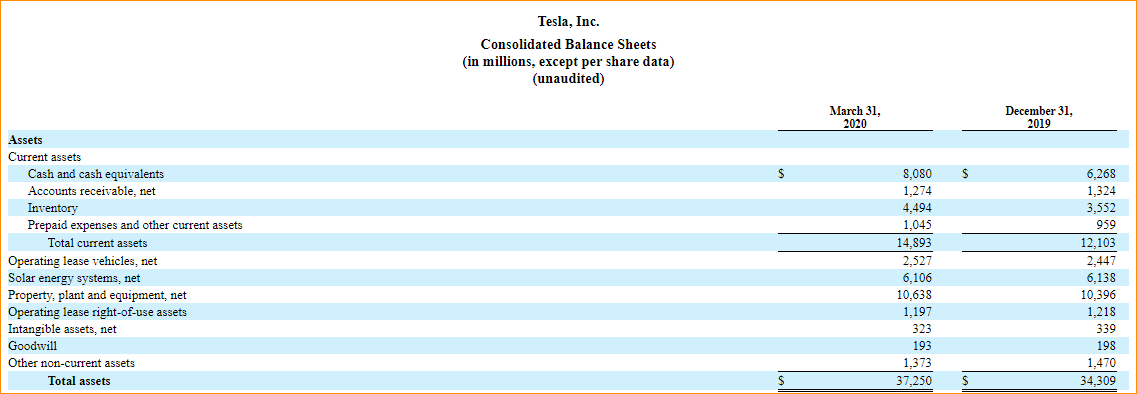

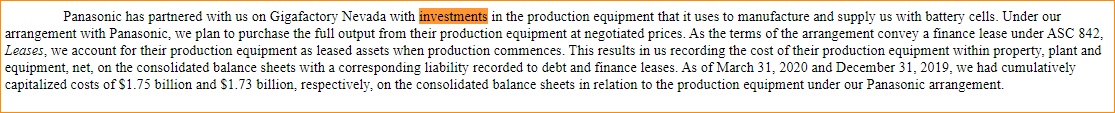
'0001564590-20-019931', pg. 19

In [40]:
abt[['company_name', 'Short_term_investments', 'Filing/Acc.No.']][abt['company_name']=='Tesla']

company_name  Short_term_investments              Filing/Acc.No.
0         Tesla                     NaN  10-Q, 0001564590-20-019931
1         Tesla                     NaN  10-Q, 0001564590-19-038256
2         Tesla                     NaN  10-Q, 0001564590-19-026445
3         Tesla                     NaN  10-Q, 0001564590-19-013462
4         Tesla                     NaN  10-Q, 0001564590-18-026353
5         Tesla                     NaN  10-Q, 0001564590-18-019254
6         Tesla                     NaN  10-Q, 0001564590-18-011086
7         Tesla                     NaN  10-Q, 0001564590-17-021343
8         Tesla                     NaN  10-Q, 0001564590-17-015705
9         Tesla                     NaN  10-Q, 0001564590-17-009968
10        Tesla              23711000.0  10-Q, 0001564590-16-026820
11        Tesla              24525000.0  10-Q, 0001564590-16-023024
12        Tesla              23980000.0  10-Q, 0001564590-16-018886
13        Tesla              25223000.0  10-Q, 0001564590-15-009741
14        Tesla              20591000.0  10-Q, 0001564590-15-006666
15        Tesla              20693000.0  10-Q, 0001564590-15-003789
16        Tesla                     NaN  10-K, 0001564590-20-004475
17        Tesla                     NaN  10-K, 0001564590-19-003165
18        Tesla                     NaN  10-K, 0001564590-18-002956
19        Tesla                     NaN  10-K, 0001564590-17-003118
20        Tesla              22628000.0  10-K, 0001564590-16-013195
21        Tesla              17947000.0  10-K, 0001564590-15-001031

In [41]:
# Create Indicator Variable 
abt['Short_term_investments_missing'] = abt['Short_term_investments'].isnull().astype(int)

In [42]:
abt.columns

Index(['Quarter', 'Year', 'Accounts Receivable', 'Inventory',
       'Total current assets', 'Operating lease vehicles',
       'Solar energy systems', 'Goodwill', 'Accrued Liabilities',
       'Customer deposits', 'Total current liabilities', 'Total liabilities',
       'Common Stock', 'Additional paid in capital',
       'Total liabilities and equity', 'Filing/Acc.No.',
       'Total Noncontrolling interests in subsidiaries',
       'MyPower customer notes receivable', 'Total Resale value guarantees',
       'Solar bonds issued to related parties',
       'Total Convertible Senior Notes', 'Total Restricted Cash',
       'company_name', 'Accrued compensation', 'Total Other',
       'Vendor non trade receivables', 'Other non current liabilities',
       'Commercial paper', 'Accrued expenses', 'Current content liabilities',
       'Non current content liabilities', 'Content Assets',
       'Accrued expenses and other current liabilities',
       'Income taxes receivable', 'Non marketabl

In [43]:
# Fill in the original missing value with 0.
abt['Short_term_investments'].fillna(0, inplace=True)

In [44]:
# Checking if there are any other missing values in the feature. 
abt[ 'Short_term_investments' ].isnull().sum()

0

***The above described process is how we reiterated through each column that share semantic similarity in the column name and visually compared if the data 'fit' together cohesively. This painstaking process is essentially how we ended up with the vlaues in the col_name_converter dictionary.***

We will iterate over the processes described above to clean the remainder of our dataframe either by:

1) Create Indicator Variable to show missingness across a company

or

2) Merge and combine multiple simialr columns together to form a feature. 

### Inventory
#### Netflix missing

In [45]:
# Netflix Inventory name is Content Assets.
abt['Inventory'] = abt[['Inventory', 'Content Assets']].sum(axis=1, min_count=1)
abt.drop(['Content Assets'], axis=1, inplace=True)

#### Facebook missing

In [46]:
# Facebook does not have Inventory. 
abt['Inventory_missing'] = abt['Inventory'].isnull().astype(int)
abt['Inventory'].fillna(0, inplace=True)
abt[ 'Inventory_missing' ].isnull().sum()

0

### Total Non-Current Assets
####  Ford missing

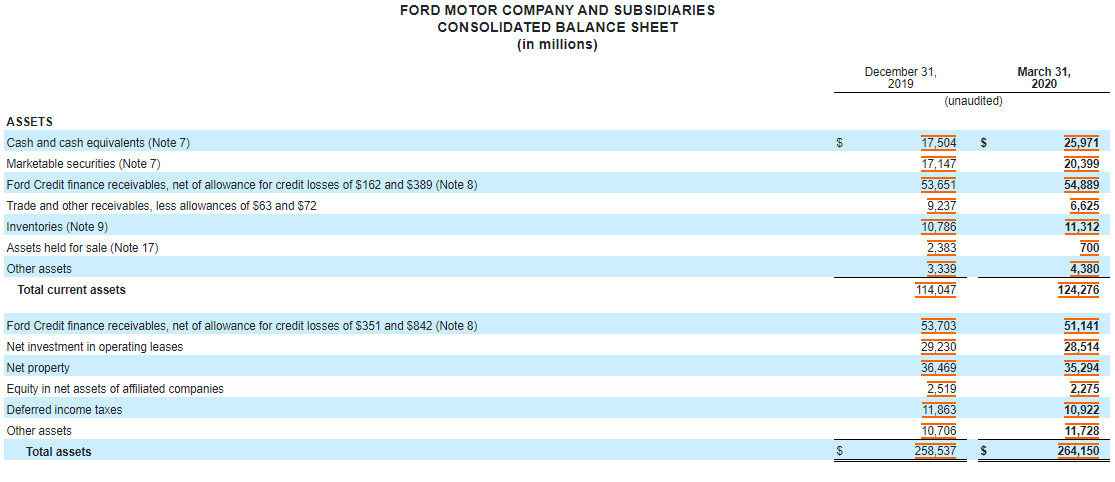
'0000037996-20-000041'

##### 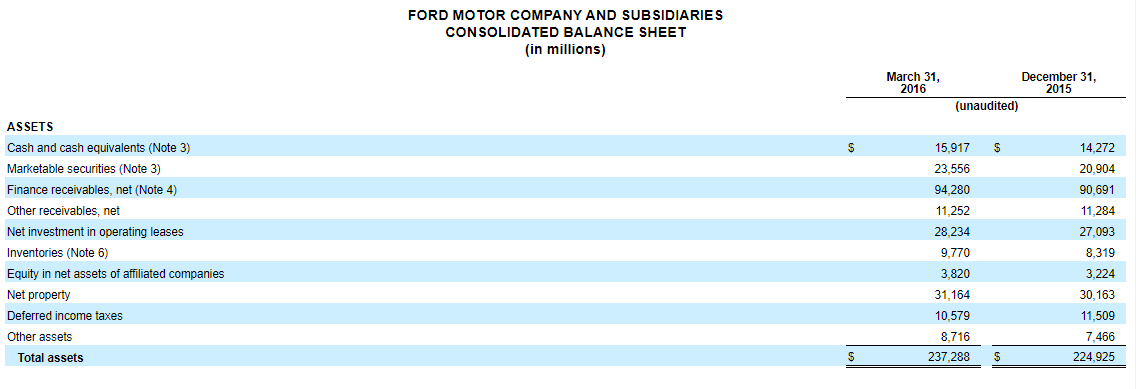
'0000037996-16-000107'

In [47]:
# Conceptually: Total_Assets - Total current assets = Total Non-Current Assets
df = abt['Total_Assets'][abt['company_name']=='Ford'] - abt['Total current assets'][abt['company_name']=='Ford']

In [48]:
type(df)

pandas.core.series.Series

In [49]:
abt.at[169:198, 'Total Non-Current Assets']  = df

## Total Non-Current Assets

In [50]:
TNCA_missing_index = abt[abt['Total Non-Current Assets'].isnull()].index.tolist()
TNCA_missing_index

[68,
 69,
 70,
 71,
 72,
 73,
 78,
 79,
 112,
 113,
 114,
 115,
 127,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 195,
 196,
 197,
 198]

In [51]:
for i in TNCA_missing_index:
    print(abt['company_name'][abt.index == i].values)

['Apple']
['Apple']
['Apple']
['Apple']
['Apple']
['Apple']
['Apple']
['Apple']
['Netflix']
['Netflix']
['Netflix']
['Netflix']
['Netflix']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']


In [52]:
for i in TNCA_missing_index:
    
    sum_TNCA = abt.iloc[i, abt.columns == 'Total_Assets'].values - abt.iloc[i, abt.columns == 'Total current assets'].values
    abt.at[i, 'Total Non-Current Assets'] = sum_TNCA

In [53]:
# After executing the above code to update TNCA_missing_index.
TNCA_missing_index = abt[abt['Total Non-Current Assets'].isnull()].index.tolist()

for i in TNCA_missing_index:
    print(abt['company_name'][abt.index == i].values)

['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']


For the remaining null values in Ford's TNCA column we will compute this later.

## Non-Current Liabilities

In [54]:
NCL_missing_index = abt[abt['Non-Current Liabilities'].isnull()].index.tolist()
NCL_missing_index

[0,
 1,
 2,
 3,
 13,
 14,
 15,
 16,
 20,
 21,
 54,
 55,
 56,
 57,
 58,
 74,
 75,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 196,
 197,
 198]

In [55]:
for i in NCL_missing_index:
    print(abt['company_name'][abt.index == i].values)

['Tesla']
['Tesla']
['Tesla']
['Tesla']
['Tesla']
['Tesla']
['Tesla']
['Tesla']
['Tesla']
['Tesla']
['Apple']
['Apple']
['Apple']
['Apple']
['Apple']
['Apple']
['Apple']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']
['Ford']


In [56]:
for i in NCL_missing_index:
    
    sum_NCL = abt.iloc[i, abt.columns == 'Total liabilities'].values - abt.iloc[i, abt.columns == 'Total current liabilities'].values
    abt.at[i, 'Non-Current Liabilities'] = sum_NCL

In [57]:
NCL_missing_index = abt[abt['Non-Current Liabilities'].isnull()].index.tolist()

for i in NCL_missing_index:
    print(abt.at[i, 'Non-Current Liabilities'])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


## Total Liabilities

In [58]:
TL_missing_index = abt[abt['Total liabilities'].isnull()].index.tolist()
TL_missing_index

[163, 168]

In [59]:
for i in TL_missing_index:
    print(abt['company_name'][abt.index == i].values)

['Google']
['Google']


In [60]:
for i in TL_missing_index:
    
    sum_TL = abt.iloc[i, abt.columns == 'Total current liabilities'].values + abt.iloc[i, abt.columns == 'Total current liabilities'].values
    abt.at[i, 'Total liabilities'] = sum_TL

In [61]:
TL_missing_index = abt[abt['Total liabilities'].isnull()].index.tolist()

for i in TL_missing_index:
    print(abt.at[i, 'Total liabilities'])

## OCI (Tesla)

In [62]:
OCI_missing_index = abt[abt['OCI'].isnull()].index.tolist()
OCI_missing_index

[21, 68, 69, 78]

In [63]:
for i in OCI_missing_index:
    print(abt[['company_name', 'Filing/Acc.No.']][abt.index == i].values)

[['Tesla' '10-K, 0001564590-15-001031']]
[['Apple' '10-Q, 0001193125-15-259935']]
[['Apple' '10-Q, 0001193125-15-153166']]
[['Apple' '10-K, 0001193125-15-356351']]


In [64]:
abt.at[21, 'OCI'] = 294062*10**3

In [65]:
abt.at[68, 'OCI'] = 1098*10**6

In [66]:
abt.at[69, 'OCI'] = 2710*10**6

In [67]:
abt.at[78, 'OCI'] = 345*10**6

In [68]:
OCI_missing_index = abt[abt['OCI'].isnull()].index.tolist()

for i in OCI_missing_index:
    print(abt.at[i, 'Total liabilities'])

The remaining missing instances should be sparse and low enough for us to make meaningful interpolations on the data. 

In [69]:
dirty_col_name = list(abt.columns[abt.isna().sum() > 0])
print(f'dirty_col_name list has {len(dirty_col_name)} values')

dirty_col_name list has 49 values


In [70]:
# Columns that need to be dropped. 
dirty_col_name_loc = []

for columns in dirty_col_name:
    
    ratio = abt[columns].notna().astype(int).mean()
    
    # Set ( valid : missing ) ratio threshold
    if 0.6 > ratio:
        
        dirty_col_name_loc.append((columns, ratio))

print(f'Length of dirty_col_name_loc: {len(dirty_col_name_loc)} \n' )
pprint( sorted(dirty_col_name_loc, key=lambda tup : tup[1] ) )

Length of dirty_col_name_loc: 44 

[('Solar bonds issued to related parties', 0.0273972602739726),
 ('Series A', 0.030821917808219176),
 ('Series B', 0.030821917808219176),
 ('MyPower customer notes receivable', 0.04452054794520548),
 ('Solar energy systems', 0.04794520547945205),
 ('Total Noncontrolling interests in subsidiaries', 0.04794520547945205),
 ('Capital surplus', 0.05136986301369863),
 ('Automotive debt payable within one year', 0.0547945205479452),
 ('Automotive long term debt', 0.0547945205479452),
 ('Total Resale value guarantees', 0.06164383561643835),
 ('Total Convertible Senior Notes', 0.06164383561643835),
 ('Income taxes receivable', 0.06506849315068493),
 ('Non marketable investments', 0.06506849315068493),
 ('Accrued compensation and benefits', 0.06506849315068493),
 ('Accrued revenue share', 0.06506849315068493),
 ('Total Restricted cash and marketable securities', 0.0684931506849315),
 ('Total Restricted Cash', 0.07191780821917808),
 ('Operating lease vehicles', 

Before we delete the features, let's have a last look at it. 
From the above output we see **'Goodwill'** has the highest non-null values, but still only half of the values are present for the feature the other half is missing. Unfortuantely we could not fill in the missing values. So we will delete the rest of dirty_col_name_loc. 

In [71]:
# Delete the columns that are too dirty for us to inpute/clean.
abt.drop([name for name, ratio in  dirty_col_name_loc], axis=1, inplace=True)

In [72]:
abt.shape

(292, 25)

## Set the index, and reset the index to perform time-series manipulations. 

In [73]:
# Create new Dataframe, first ordered by company, then chronologically. 
df_ordered_list = []

for name in company_name.keys():
    df = abt[ abt['company_name'] == name ].copy()
    df.set_index(['Year', 'Quarter'], drop=True, inplace=True)
    df.sort_index(ascending=True, sort_remaining= True, inplace=True)
    df_ordered_list.append(df)

In [74]:
df_ordered = pd.concat(df_ordered_list)

# Where is the Missing Values?


In [75]:
# Check to see the spread of missing values. 
null_mask = df_ordered.isna().groupby(df_ordered['company_name'], sort=True).sum()
null_mask

Accounts Receivable  Inventory  Total current assets  \
company_name                                                         
Amazon                        0.0        0.0                   0.0   
Apple                         0.0        0.0                   0.0   
Facebook                      0.0        0.0                   0.0   
Ford                          0.0        0.0                  14.0   
GM                            0.0        0.0                   0.0   
Google                        0.0        0.0                   0.0   
Microsoft                     0.0        0.0                   0.0   
Netflix                       0.0        0.0                   0.0   
Tesla                         0.0        0.0                   0.0   

              Total current liabilities  Total liabilities  Common Stock  \
company_name                                                               
Amazon                              0.0                0.0           0.0   
Apple                               0.0                0.0           0.0   
Facebook                            0.0                0.0           0.0   
Ford                               14.0                0.0           0.0   
GM                                  0.0                0.0           0.0   
Google                              0.0                0.0           0.0   
Microsoft                           0.0                0.0           0.0   
Netflix                             0.0                0.0           0.0   
Tesla                               0.0                0.0           0.0   

              Total liabilities and equity  Filing/Acc.No.  company_name  \
company_name                                                               
Amazon                                 0.0             0.0           0.0   
Apple                                  0.0             0.0           0.0   
Facebook                               0.0             0.0           0.0   
Ford                                   0.0             0.0           0.0   
GM                                     0.0             0.0           0.0   
Google                                 0.0             0.0           0.0   
Microsoft                              0.0             0.0           0.0   
Netflix                                0.0             0.0           0.0   
Tesla                                  0.0             0.0           0.0   

              New Deferred Revenue  New Property and Equipment  \
company_name                                                     
Amazon                         0.0                         0.0   
Apple                          0.0                         0.0   
Facebook                       0.0                         0.0   
Ford                           0.0                         0.0   
GM                             0.0                         0.0   
Google                         0.0                         0.0   
Microsoft                      0.0                         0.0   
Netflix                        0.0                         0.0   
Tesla                          0.0                         0.0   

              Total Non-Current Assets  Total_Assets  Non-Current Liabilities  \
company_name                                                                    
Amazon                             0.0           0.0                      0.0   
Apple                              0.0           0.0                      0.0   
Facebook                           0.0           0.0                      0.0   
Ford                              14.0           0.0                     12.0   
GM                                 0.0           0.0                      0.0   
Google                             0.0           0.0                      0.0   
Microsoft                          0.0           0.0                      0.0   
Netflix                            0.0           0.0                      0.0   
Tesla                           

In [76]:
# Create a mask to filter out only the missing values. 
sum_of_nulls = null_mask[ null_mask>0 ].dropna(axis=1, how='all').dropna(axis=0, how='all').fillna(False)

In [77]:
# Show shape and concise view of filtered result. 
print(sum_of_nulls.shape)
sum_of_nulls

(2, 5)


Total current assets Total current liabilities  \
company_name                                                  
Ford                           14                        14   
Netflix                     False                     False   

             Total Non-Current Assets Non-Current Liabilities  \
company_name                                                    
Ford                               14                      12   
Netflix                         False                   False   

             Accounts Payables  
company_name                    
Ford                     False  
Netflix                      1

In [78]:
columns =  list(sum_of_nulls.columns)
index = list(sum_of_nulls.index)
print(columns, '\n', index)

['Total current assets', 'Total current liabilities', 'Total Non-Current Assets', 'Non-Current Liabilities', 'Accounts Payables'] 
 ['Ford', 'Netflix']


In [79]:
null_list = [(attr, name) for name  in index for attr in columns if sum_of_nulls[attr][sum_of_nulls.index==name].any()]
len(null_list)

5

Ford Total current assets
This is the missing year distribution:  [(2012, 'Q4'), (2013, 'Q1'), (2013, 'Q2'), (2013, 'Q3'), (2013, 'Q4'), (2014, 'Q1'), (2014, 'Q2'), (2014, 'Q3'), (2014, 'Q4'), (2015, 'Q1'), (2015, 'Q2'), (2015, 'Q3'), (2015, 'Q4'), (2016, 'Q1')]
This requires Extrapolation


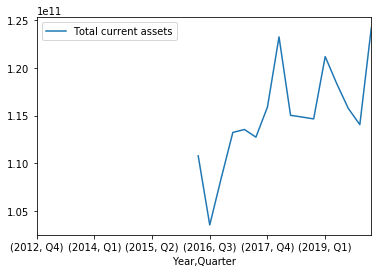

----------------------------------------------------------------------
Ford Total current liabilities
This is the missing year distribution:  [(2012, 'Q4'), (2013, 'Q1'), (2013, 'Q2'), (2013, 'Q3'), (2013, 'Q4'), (2014, 'Q1'), (2014, 'Q2'), (2014, 'Q3'), (2014, 'Q4'), (2015, 'Q1'), (2015, 'Q2'), (2015, 'Q3'), (2015, 'Q4'), (2016, 'Q1')]
This requires Extrapolation


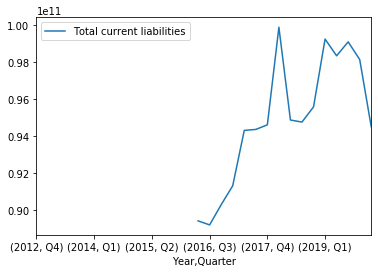

----------------------------------------------------------------------
Ford Total Non-Current Assets
This is the missing year distribution:  [(2012, 'Q4'), (2013, 'Q1'), (2013, 'Q2'), (2013, 'Q3'), (2013, 'Q4'), (2014, 'Q1'), (2014, 'Q2'), (2014, 'Q3'), (2014, 'Q4'), (2015, 'Q1'), (2015, 'Q2'), (2015, 'Q3'), (2015, 'Q4'), (2016, 'Q1')]
This requires Extrapolation


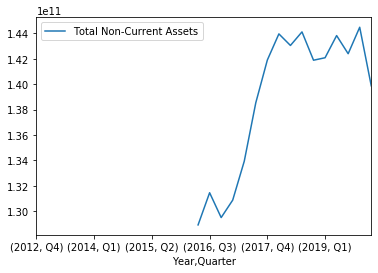

----------------------------------------------------------------------
Ford Non-Current Liabilities
This is the missing year distribution:  [(2012, 'Q4'), (2013, 'Q1'), (2013, 'Q2'), (2013, 'Q3'), (2013, 'Q4'), (2014, 'Q1'), (2014, 'Q2'), (2014, 'Q3'), (2014, 'Q4'), (2015, 'Q1'), (2015, 'Q2'), (2015, 'Q3')]
This requires Extrapolation


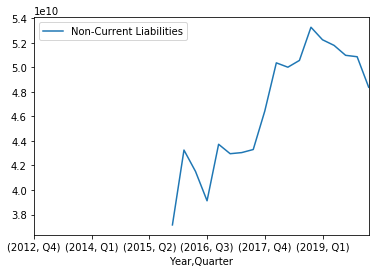

----------------------------------------------------------------------
Netflix Accounts Payables
This is the missing year distribution:  [(2011, 'Q4')]
This requires Interpolation


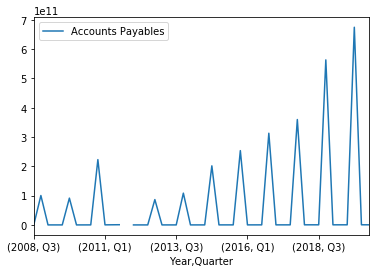

----------------------------------------------------------------------


In [80]:
# Detect missing values are in the middle or at the sides, extrapolation or interpolation 
interpolate = []
extrapolate = []

for attr, name in null_list:
    plt.figure()
    print(name, attr)
    
    whole_column_index = df_ordered[attr][(df_ordered['company_name']==name)]
    missing = df_ordered[attr][(df_ordered['company_name']==name) & (df_ordered[attr].isna())]
    
    num_of_missing = len(missing)
#     print('Number of missing values: ', num_of_missing)
    
    missing_year_list = list(missing.index)
    print('This is the missing year distribution: ', missing_year_list)

    whole_year_min = whole_column_index[:1].index.values[0]
    whole_year_max = whole_column_index[-1:].index.values[0]
    
    if (whole_year_min in missing_year_list) or (whole_year_max in missing_year_list):
        print('This requires Extrapolation')
        extrapolate.append( (name, attr) )
        
    elif (whole_year_min not in missing_year_list) or (whole_year_max not in missing_year_list):
        print('This requires Interpolation')
        interpolate.append( (name, attr) )
        
    df_ordered[attr][df_ordered['company_name']==name].plot(legend=True)
    plt.show()
    print('-'*70)
    

In [81]:
interpolate

[('Netflix', 'Accounts Payables')]

In [82]:
extrapolate

[('Ford', 'Total current assets'),
 ('Ford', 'Total current liabilities'),
 ('Ford', 'Total Non-Current Assets'),
 ('Ford', 'Non-Current Liabilities')]

In [83]:
for company, feature in extrapolate:
    print(feature)
    

Total current assets
Total current liabilities
Total Non-Current Assets
Non-Current Liabilities


From the above we can clearly see which company and features need to be interpolated and which need to be extrapolated. However, not all of them requires us to compute using extrapolation techniques. 

For example, Apple is **only** missing 'Total Non-Current Assets' whereas Ford is missing both 'Total Non-Current Assets' **AND** 'Total current assets'. 
The difference here, is that we can infer what the value is for Apples' 'Total Non-Current Assets' by simply deducting 'Total Current Assets' from 'Total Assets', but we cannot do the same for Ford.

## 2.3 Extrapolation

Which is a better method to fill in time series data? Our metric of comparison is MSE.

In [84]:
a = [1,2]
a + [3]

[1, 2, 3]

In [85]:
# First lets grab all of Ford columns with nan values into a df.  
nan_Ford = df_ordered[[feature for company, feature in extrapolate]+ ['Total_Assets', 'Total liabilities']][df_ordered['company_name']=='Ford'].sort_index(ascending=False, sort_remaining= True, inplace=False)

# 'Total Non-Current Assets' is made up from subtracting 'Total current assets'  from 'Total_Assets'.
# nan_Ford['Total Non-Current Assets'] + nan_Ford['Total current assets'] == nan_Ford['Total_Assets']

In [86]:
nan_Ford

Total current assets  Total current liabilities  \
Year Quarter                                                    
2020 Q1               1.242760e+11               9.449400e+10   
2019 Q4               1.140470e+11               9.813200e+10   
     Q3               1.157540e+11               9.908700e+10   
     Q2               1.183510e+11               9.833400e+10   
     Q1               1.211950e+11               9.923700e+10   
2018 Q4               1.146490e+11               9.556900e+10   
     Q3               1.148430e+11               9.475000e+10   
     Q2               1.150250e+11               9.486100e+10   
     Q1               1.232640e+11               9.987800e+10   
2017 Q4               1.159020e+11               9.460000e+10   
     Q3               1.127320e+11               9.435200e+10   
     Q2               1.135390e+11               9.429900e+10   
     Q1               1.132280e+11               9.130400e+10   
2016 Q4               1.084610e+11               9.028100e+10   
     Q3               1.035150e+11               8.918800e+10   
     Q2               1.107670e+11               8.940800e+10   
     Q1                        NaN                        NaN   
2015 Q4                        NaN                        NaN   
     Q3                        NaN                        NaN   
     Q2                        NaN                        NaN   
     Q1                        NaN                        NaN   
2014 Q4                        NaN                        NaN   
     Q3                        NaN                        NaN   
     Q2                        NaN                        NaN   
     Q1                        NaN                        NaN   
2013 Q4                        NaN                        NaN   
     Q3                        NaN                        NaN   
     Q2                        NaN                        NaN   
     Q1                        NaN                        NaN   
2012 Q4                        NaN                        NaN   

              Total Non-Current Assets  Non-Current Liabilities  Total_Assets  \
Year Quarter                                                                    
2020 Q1                   1.398740e+11             4.837900e+10  2.641500e+11   
2019 Q4                   1.444900e+11             5.086500e+10  2.585370e+11   
     Q3                   1.424030e+11             5.098100e+10  2.581570e+11   
     Q2                   1.438330e+11             5.179100e+10  2.621840e+11   
     Q1                   1.420860e+11             5.224800e+10  2.632810e+11   
2018 Q4                   1.418910e+11             5.326900e+10  2.565400e+11   
     Q3                   1.441230e+11             5.056400e+10  2.589660e+11   
     Q2                   1.430540e+11             5.001200e+10  2.580790e+11   
     Q1                   1.439660e+11             5.036600e+10  2.672300e+11   
2017 Q4                   1.419060e+11             4.643700e+10  2.578080e+11   
     Q3                   1.385410e+11             4.330200e+10  2.512730e+11   
     Q2                   1.339300e+11             4.305100e+10  2.474690e+11   
     Q1                   1.308660e+11             4.296000e+10  2.440940e+11   
2016 Q4                   1.294900e+11             4.373000e+10  2.379510e+11   
     Q3                   1.314480e+11             3.912300e+10  2.349630e+11   
     Q2                   1.289110e+11             4.151500e+10  2.396780e+11   
     Q1                            NaN             4.325800e+10  2.372880e+11   
2015 Q4                            NaN             3.715600e+10  2.086150e+11   
     Q3                            NaN                      NaN  2.194310e+11   
     Q2                            NaN                      NaN  2.160450e+11   
     Q1                            NaN                      NaN  2.123740e+11   
2014 Q4                            NaN                      NaN  2.021

Considering the relationship of our missing Asset-side data, we only need to infer the ratio between 'Total current assets' and 'Total Non-current Assets' from before 2016 Q1. As the sum of these two missing values is known as 'Total_Assets'.

The ratios between current and non-current assets exhibit a relatively stable relationship. (see plot below)

#### Total current assets

In [87]:
valid_rows = len(nan_Ford['Total current assets'][nan_Ford['Total current assets'].notna()])
# Ratio between 'Total current assets' and 'Total Non-Current Assets'.
TCA_TA_ratio = nan_Ford['Total current assets'][:valid_rows] / nan_Ford['Total_Assets'][:valid_rows]
#Plot ratio.
# TCA_TA_ratio.plot(ylim=[0.4, 0.5])

Therefore we will try to use autoregressive moving average to extrapolate the missing values. 

In [88]:
from statsmodels.tsa.arima_model import ARMA

In [89]:
# Our small sample of training data are the non-null ratios. 
train_data = TCA_TA_ratio[TCA_TA_ratio.notna()].values
# print(train_data)

In [90]:
# ARMA( order = p=1, q=0 )
model = ARMA(train_data, order=(2,2))
model_fitted = model.fit()
# print(model_fitted.summary())
pred_ratio_TCA = model_fitted.predict(start=valid_rows+1, end=len(nan_Ford)-1)
print(pred_ratio_TCA)

[0.46005569 0.44931614 0.44583019 0.45645406 0.45954484 0.44904627
 0.4463387  0.45670289 0.45903925 0.44881796 0.4468408  0.45691121
 0.45854118 0.44862909]


In [91]:
# Create a ratio dataframe for plotting. 
ratio_plot = pd.DataFrame(pred_ratio_TCA, range(len(pred_ratio_TCA)))
# Using values p=2, q=2, we have a stationary prediction. 
# ratio_plot.plot()

In [92]:
fill_TCA = nan_Ford['Total current assets'].copy()
fill_TCA[fill_TCA.isna()] = nan_Ford['Total_Assets'][valid_rows:]*pred_ratio_TCA
fill_TCA

Year  Quarter
2020  Q1         1.242760e+11
2019  Q4         1.140470e+11
      Q3         1.157540e+11
      Q2         1.183510e+11
      Q1         1.211950e+11
2018  Q4         1.146490e+11
      Q3         1.148430e+11
      Q2         1.150250e+11
      Q1         1.232640e+11
2017  Q4         1.159020e+11
      Q3         1.127320e+11
      Q2         1.135390e+11
      Q1         1.132280e+11
2016  Q4         1.084610e+11
      Q3         1.035150e+11
      Q2         1.107670e+11
      Q1         1.091657e+11
2015  Q4         9.373409e+10
      Q3         9.782896e+10
      Q2         9.861462e+10
      Q1         9.759538e+10
2014  Q4         9.078773e+10
      Q3         9.321114e+10
      Q2         9.633919e+10
      Q1         9.505877e+10
2013  Q4         8.500881e+10
      Q3         8.984673e+10
      Q2         8.965055e+10
      Q1         8.850303e+10
2012  Q4         8.001210e+10
Name: Total current assets, dtype: float64

In [93]:
# Update our main df. 
df_ordered['Total current assets'][df_ordered['company_name']=='Ford'] = fill_TCA

C:\Users\Matthew\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


When p=1, and q=0 visually looks good, after checking larger values there are no improvement, so we will use the predictions where p=1, and q=0. 

In [94]:
nan_Ford['Total current assets'] = fill_TCA

#### Total Non-Current Assets

In [95]:
nan_Ford['Total Non-Current Assets'] = nan_Ford['Total_Assets'] - nan_Ford['Total current assets']

In [96]:
# Update our main df.
df_ordered['Total Non-Current Assets'][df_ordered['company_name']=='Ford'] = nan_Ford['Total Non-Current Assets']

C:\Users\Matthew\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We will do the same for 'Total current liabilities', and 'Non-Current Liabilities'.

#### Total current liabilities 

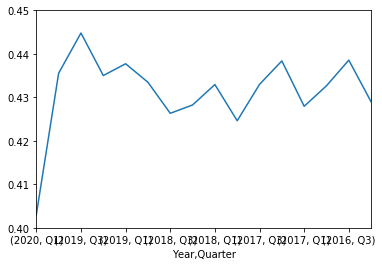

In [97]:
# From the plot below, we see the relationship remains very stable, so we will use the mean instead.
valid_rows = len(nan_Ford['Total current liabilities'][nan_Ford['Total current liabilities'].notna()])
# Ratio between 'Total current assets' and 'Total Non-Current Assets'.
TCL_TL_ratio = nan_Ford['Total current liabilities'][:valid_rows] / nan_Ford['Total liabilities'][:valid_rows]
TCL_TL_ratio.plot(ylim=[0.4, 0.45])

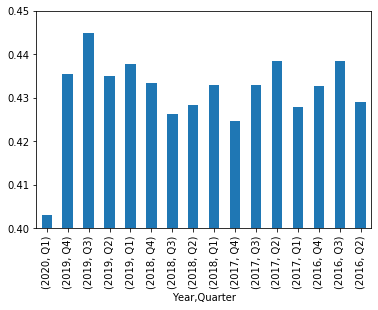

In [98]:
# Deducting the most recent data, we will have a stationary time-series. 
TCL_TL_ratio.plot(kind='bar',ylim=[0.4, 0.45])

In [99]:
# delete the most recent data & most irrelevant. 
TCL_TL_ratio.pop((2020, 'Q1'))

0.4030419872724481

In [100]:
valid_rows+1

17

In [101]:
# Our small sample of training data are the non-null ratios. 
train_data = TCL_TL_ratio[TCL_TL_ratio.notna()].values
# print(train_data)

In [102]:
# ARMA( order = p=1, q=0 )
model = ARMA(train_data, order=(1,1))
model_fitted = model.fit()
# print(model_fitted.summary())
pred_ratio_TCL = model_fitted.predict(start=(valid_rows+1), end=(len(nan_Ford)-2))
print(pred_ratio_TCL)

[0.43359728 0.43350863 0.43343374 0.43337048 0.43331704 0.43327189
 0.43323375 0.43320153 0.43317431 0.43315132 0.43313189 0.43311548
 0.43310162 0.43308991]


In [103]:
len(pred_ratio_TCL)

14

In [104]:
fill_TCL = nan_Ford['Total current liabilities'].copy()
fill_TCL[fill_TCL.isna()] = nan_Ford['Total liabilities'][valid_rows:]*pred_ratio_TCL

In [105]:
# fill_TCL.plot()

In [106]:
# Update our main df. 
df_ordered['Total current liabilities'][df_ordered['company_name']=='Ford'] = fill_TCL

C:\Users\Matthew\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Non-Current Liabilities

In [107]:
valid_rows = len(nan_Ford['Non-Current Liabilities'][nan_Ford['Non-Current Liabilities'].notna()])
# Ratio between 'Total current assets' and 'Total Non-Current Assets'.
NCL_TL_ratio = nan_Ford['Non-Current Liabilities'][:valid_rows] / nan_Ford['Total liabilities'][:valid_rows]

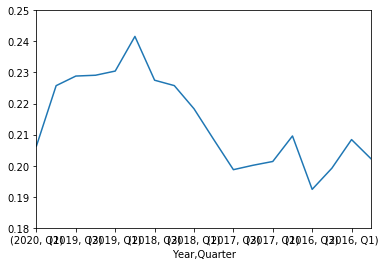

In [108]:
NCL_TL_ratio.plot(ylim= [0.18, 0.25])

In [109]:
NCL_TL_ratio.describe()

count    18.000000
mean      0.214114
std       0.014378
min       0.192375
25%       0.201552
50%       0.209000
75%       0.227078
max       0.241611
dtype: float64

The data does not represent a stationary time series, and has a low std, we will use the mean to approximate the relationship.

In [110]:
fill_NCL = nan_Ford['Non-Current Liabilities'].copy()
fill_NCL[fill_NCL.isna()] = nan_Ford['Total liabilities'][valid_rows:]*NCL_TL_ratio.mean()

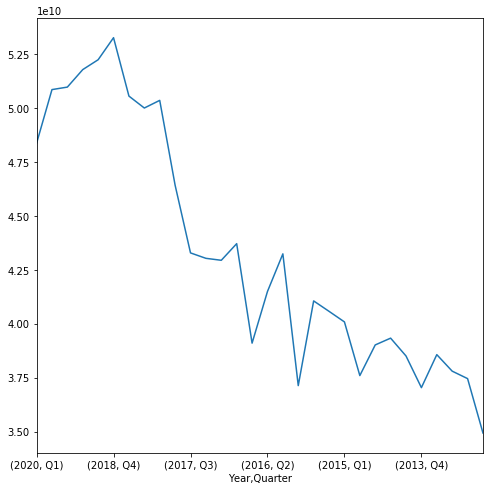

In [111]:
fill_NCL.plot(figsize=(8,8))

In [112]:
# Update our main df. 
df_ordered['Non-Current Liabilities'][df_ordered['company_name']=='Ford'] = fill_NCL

C:\Users\Matthew\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Great! Ford looks all clean, we will move on to Netflix.

## Interpolate

In [113]:
df_ordered.interpolate(axis=0, inplace=True)

In [114]:
df_ordered['Accounts Payables'][df_ordered['company_name']=='Netflix']

Year  Quarter
2008  Q3         1.092770e+08
      Q4         1.003440e+11
2009  Q1         1.127670e+08
      Q2         1.016340e+08
      Q3         9.345100e+07
      Q4         9.147500e+10
2010  Q1         1.027030e+08
      Q2         1.200310e+08
      Q3         1.701200e+08
      Q4         2.228240e+11
2011  Q1         3.010090e+08
      Q2         5.334360e+08
      Q3         7.501070e+08
      Q4         4.166130e+08
2012  Q1         8.311900e+07
      Q2         9.096100e+07
      Q3         9.151100e+07
      Q4         8.646800e+10
2013  Q1         1.028220e+08
      Q2         1.034410e+08
      Q3         1.008990e+08
      Q4         1.084350e+11
2014  Q1         1.338830e+08
      Q2         1.372260e+08
      Q3         1.503740e+08
      Q4         2.015810e+11
2015  Q1         1.905670e+08
      Q2         2.117290e+08
      Q3         2.093650e+08
      Q4         2.534910e+11
2016  Q1         2.319140e+08
      Q2         2.404580e+08
      Q3         2.857530e

In [115]:
# Check to see the spread of missing values. 
null_mask = df_ordered.isna().groupby(df_ordered['company_name'], sort=True).sum()
# Create a mask to filter out only the missing values. 
sum_of_nulls = null_mask[ null_mask>0 ].dropna(axis=1, how='all').dropna(axis=0, how='all').fillna(False)
print(sum_of_nulls.shape)
sum_of_nulls

(0, 0)


Empty DataFrame
Columns: []
Index: []

In [116]:
abt = df_ordered.reset_index()

In [117]:
abt.head()

Year Quarter  Accounts Receivable     Inventory  Total current assets  \
0  2014      Q4          226604000.0  9.536750e+08          3.198657e+09   
1  2015      Q1          200052000.0  1.054840e+09          2.921417e+09   
2  2015      Q2          138648000.0  1.212279e+09          2.628621e+09   
3  2015      Q3          119964000.0  1.293717e+09          2.998795e+09   
4  2015      Q4          168965000.0  1.277838e+09          2.791568e+09   

   Total current liabilities  Total liabilities  Common Stock  \
0               2.107166e+09       4.879345e+09      126000.0   
1               2.192381e+09       5.239756e+09      126000.0   
2               2.384388e+09       5.701978e+09      127000.0   
3               2.553771e+09       6.186660e+09      131000.0   
4               2.816274e+09       6.961471e+09      131000.0   

   Total liabilities and equity              Filing/Acc.No. company_name  \
0                    5849251000  10-K, 0001564590-15-001031        Tesla   
1                    6120030000  10-Q, 0001564590-15-003789        Tesla   
2                    6468185000  10-Q, 0001564590-15-006666        Tesla   
3                    7547497000  10-Q, 0001564590-15-009741        Tesla   
4                    8092460000  10-K, 0001564590-16-013195        Tesla   

   New Deferred Revenue  New Property and Equipment  Total Non-Current Assets  \
0           483922000.0                1.829267e+09                43209000.0   
1           539324000.0                2.224191e+09                48515000.0   
2           623155000.0                2.646017e+09                53527000.0   
3           710378000.0                3.103811e+09                57811000.0   
4           870066000.0                3.403334e+09                74633000.0   

   Total_Assets  Non-Current Liabilities  Total Shareholder's Equity  \
0  5.849251e+09             2.772179e+09                9.117100e+08   
1  6.120030e+09             3.047375e+09                8.259970e+08   
2  6.468185e+09             3.317590e+09                7.159340e+08   
3  7.547497e+09             3.632889e+09                1.314656e+09   
4  8.092460e+09             4.145197e+09                1.088944e+09   

   Accounts Payables  Retained Earning          OCI  \
0        777946000.0      1.433682e+09  294062000.0   
1        732331000.0      1.587841e+09   15965000.0   
2        771637000.0      1.772068e+09   14804000.0   
3        824861000.0      2.001926e+09   23985000.0   
4        916148000.0      2.322323e+09    3556000.0   

   Accounts_Receivable_missing  Common_Stock_missing  Short_term_investments  \
0                            0                     0              17947000.0   
1                            0                     0              20693000.0   
2                            0                     0              20591000.0   
3                            0                     0              25223000.0   
4                            0                     0              22628000.0   

   Short_term_investments_missing  Inventory_missing  
0                               0                  0  
1                               0                  0  
2                               0                  0  
3                               0                  0  
4                               0                  0

# 3. Feature Engineering, Ratios

The following are features we will engineer from the balance sheet financials. 

### Liquidity Ratios 

In [118]:
# Current ratio  = current assets/current liabilities
abt['current_ratio'] = abt['Total current assets']/abt['Total current liabilities']
# abt['current_ratio'].head()

In [119]:
# Quick ratio = (current assets – inventories)/(current liabilities)
abt['quick_ratio'] = (abt['Total current assets'] - abt['Inventory']) /abt['Total current liabilities']
# abt['quick_ratio'].head()

### Solvency Ratios

In [120]:
# Debt ratio = Total Liabilities/Total Assets
abt['debt_ratio'] = abt['Total liabilities'] / abt['Total_Assets']
# abt['debt_ratio'].head()

In [121]:
# Debt to equity ratio = Total liabilities/ Total Shareholder Equity 
abt['debt_to_equity_ratio'] = abt['Total liabilities'] / abt['Total Shareholder\'s Equity']
# abt['debt_to_equity_ratio'].head()

In [122]:
# Equity multiplier = Total Assets/Total Sharholder Equity 
abt['equity_multiplier'] = abt['Total_Assets']/abt['Total Shareholder\'s Equity']
# abt['equity_multiplier'].head()

In [123]:
tech_list = ['Facebook', 'Apple', 'Amazon', 'Netflix', 'Google', 'Microsoft']

In [124]:
auto_list = ['Ford', 'GM']

In [125]:
type(abt['company_name'])

pandas.core.series.Series

In [126]:
industry = []
for name in abt['company_name']:
    print(name)
    if name  == 'Tesla':
        industry.append(np.nan)
        
    elif name in tech_list:
        
        industry.append(1)
    else:
        industry.append(0)

Tesla
Tesla
Tesla
Tesla
Tesla
Tesla
Tesla
Tesla
Tesla
Tesla
Tesla
Tesla
Tesla
Tesla
Tesla
Tesla
Tesla
Tesla
Tesla
Tesla
Tesla
Tesla
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Microsoft
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Netflix
Facebook

In [127]:
abt['industry'] = industry

In [128]:
abt.columns

Index(['Year', 'Quarter', 'Accounts Receivable', 'Inventory',
       'Total current assets', 'Total current liabilities',
       'Total liabilities', 'Common Stock', 'Total liabilities and equity',
       'Filing/Acc.No.', 'company_name', 'New Deferred Revenue',
       'New Property and Equipment', 'Total Non-Current Assets',
       'Total_Assets', 'Non-Current Liabilities', 'Total Shareholder's Equity',
       'Accounts Payables', 'Retained Earning', 'OCI',
       'Accounts_Receivable_missing', 'Common_Stock_missing',
       'Short_term_investments', 'Short_term_investments_missing',
       'Inventory_missing', 'current_ratio', 'quick_ratio', 'debt_ratio',
       'debt_to_equity_ratio', 'equity_multiplier', 'industry'],
      dtype='object')

In [136]:
abt[['company_name', 'Short_term_investments', 'Short_term_investments_missing']].tail() 

company_name  Short_term_investments  Short_term_investments_missing
287           GM            6.021000e+09                               0
288           GM            7.049000e+09                               0
289           GM            0.000000e+00                               1
290           GM            0.000000e+00                               1
291           GM            0.000000e+00                               1

In [ ]:
abt.describe()

In [ ]:
abt.tail()

In [ ]:
print(abt.Year.unique())

In [144]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_abt = abt.select_dtypes(include=numerics)

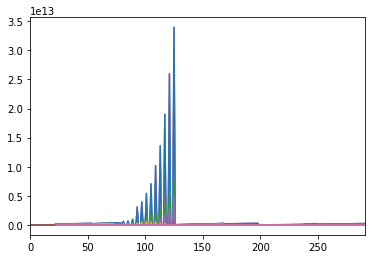

In [145]:
for column in num_abt.columns:
    abt[column].plot()

In [ ]:
abt['industry'] = abt[abt['company_name']=='Microsoft' &
    abt['company_name'] == 'Apple' & 
    abt['company_name'] == 'Netflix' & 
    abt['company_name'] == 'Facebook' & 
    abt['company_name'] == 'Google'].astype(int)

In [ ]:
# Save Dataframe
abt.to_csv('abt.csv', index=False)

# Appendix


##### A.1 Querying the Dataframe's Missing Data by Keywords
This is some code that helped me figure out the relationship of columns with missing values within companies. This code is explained in detail here: https://github.com/mcsw311093/Missing-Values

In [ ]:
# Total amount of company names. 
list_company_name = list(company_name.keys())
print(len(list_company_name), list_company_name)

# Querying the dataframe using broswse_term, returns descriptive information. 
count = 0
col_container = []

keyword = input('Enter search keyword: ')
if keyword == '':
    broswse_term = ''
else:
    broswse_term = keyword
    
print(f'(*Only Accepts Numbers!), largest_max: {len(list_company_name)+1}')
max_com = int(input('Enter maximum of unique companies returned per column name: '))
    
print(f'(*Only Accepts Numbers!), largest_min: {len(list_company_name)-1}')
in_min = int(input('Enter minimum of unique companies returned per column name: '))
if in_min == '':
    min_com = 0
else:
    min_com = in_min
print('\n\n')
for name in dirty_col_name:
    
    if re.search(f'{broswse_term}.*', name, flags=re.I):
        
        company_name_isna_list = abt['company_name'][abt[name].isna()]
        com_container = [ (col_name, freq) for (col_name, freq) in Counter(company_name_isna_list).items() ]
        
        company_name_notna_list = abt['company_name'][abt[name].notna()]
        postive_container = [ (col_name, freq) for (col_name, freq) in Counter(company_name_notna_list).items() ]
               
        amt_flagged = len(com_container)
        
        if  max_com > amt_flagged > min_com:
            
            print("\033[1m{", name , "}\033[0m")
            count+=1
            print('The following companies have nan values for the above description. Number of nan columns')
            print( com_container)
            
            print("-"*70, f'\nHow many companies do not have this column name - {amt_flagged}\n', "-"*70)
                        
            print('The following companies have numbers for this name.')
            print(postive_container)
            #print([com_name for com_name in list_company_name if com_name not in [company_name for company_name, freq in com_container]])
            print()
            col_container.append(name)

print(f'\n\nCurrently looking at {count} columns with term - \'{broswse_term}\'.\n', '~'*70)
print(col_container)

col_container.insert(0, 'company_name')
col_container.insert(len(col_container), 'Filing/Acc.No.')

abt[col_container]


The following two code blocks complement the one above.

In [ ]:
# Show data by company. 
df = abt[col_container]
df.groupby(['company_name'], sort=True).mean()

In [ ]:
# Show correlations between columns. 
df = abt[col_container]
corr = df.corr()

kot = corr[corr>=.8]
plt.figure(figsize=(12,12))
sns.heatmap(kot, cmap="Greens")

 ##### A.2 Truth Zip Match Method of Merging Similar Columns 
 Here is an attempt to qunatify the manual process of finding columns that are missing alternating blcoks of rows. 
 However, this proved to be unproductive as there are too many possible matches without considering the context from the column name. The above code uncovers related columns with greater consistency. 

In [ ]:
np.random.seed(1)
test_list2 = np.random.rand(10, 2)
df2 = pd.DataFrame(test_list2, columns= ['A', 'F'])
df_1 = df2[df2>0.5].isna()


In [ ]:
ICD.display(df_1, df_2)

In [ ]:
sample_test_TF  = pd.concat([df1[df1<0.5].isna(), df1[df1>0.5].isna() ], axis=1)
sample_test_TF

In [ ]:
sample_test_TF2

In [ ]:
sample_TF = df1[df1>0.5].isna()

In [ ]:
sample_TF

In [ ]:
np.random.seed(123)
test_list = np.random.rand(10, 2)
df1 = pd.DataFrame(test_list, columns= ['C', 'D'])
df_rand =  df1[df1>0.5].isna()
df_rand

In [ ]:
zip(df_1['F'] , df_2['B'])

In [ ]:
# Zip two columns using list comprehension 
zip_test = [num for num in zip(df_1['F'] , df_2['B'])]
pprint(zip_test )

In [ ]:
# If the right doesnt match the left, then +=1
match = 0
for a, b in zip_test:
    print(type(a))
    if a != b:
        match+=1
    
total_num = len(zip_test)
match/total_num

In [ ]:
comparing_columns(abt)


### Creating a matching metric; 1.0 represents a perfect match, 0.0 represents no match 

 - s1 = pd.Series(['X0', 'X1', 'X2', 'X3'], name='X')
 - result = pd.concat([df1, s1], axis=1)
#### Source: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
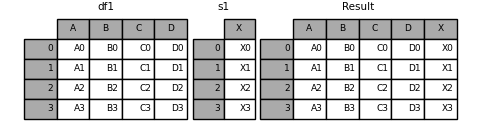

In [ ]:
test_TF = abt['Total Assets'].isna()
type(test_TF)

In [ ]:
corr = abt.corr()

kot = corr[corr>=.5]
plt.figure(figsize=(12,12))
sns.heatmap(kot, cmap="Greens")

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(abt, 3))

In [ ]:
corr = abt.corr(method='pearson')
bot = corr[corr>=.8]
bot

In [ ]:
reference_list = abt[dirty_col_name_loc].groupby(abt['company_name'], sort=True).apply(comparing_columns())

In [ ]:
def comparing_columns( df ):
    
    total_num_col = len(df)
    list_col_name = list(df.columns[df.isna().sum()>1])
    
    reference_list = {}
    
    for target_col_name in list_col_name:
        print(f'------ target_col_name - {target_col_name} ------')
        for default_col_name in list_col_name:
            
            zip_col = [ row for row in zip( df[target_col_name].isna(), df[default_col_name ].isna() ) ]
            match = 0

            
            for col_a, col_b in zip_col:
                if col_a != col_b:
                    match+=1 

            match_ratio = match/total_num_col
#             print(f'{default_col_name} : {match_ratio}')
            
            if 1 > match_ratio > 0.9:
                reference_list.update( {target_col_name : [default_col_name, match_ratio ] } )
                
            else:
                continue

    return reference_list
#                 print(f'\n ------------------------------ \n Does this match? ')
#                 print( target_col_name, default_col_name )
                
#                 response = input()
#                 if response == 'yes':

#                     # create new varible to store sum_value
#                     sum_value = df[target_col_name] + df[default_col_name]
#                     new_S = pd.Series(sum_value, name = target_col_name)

#                     # .drop(default_col_name)
#                     df = df.drop(columns= [target_col_name, default_col_name], axis= 'columns' )

#                     # pd.concat
#                     df = pd.concat([df, new_S], axis='columns')
#                     continue

#                 elif response == 'no':
#                     pass 

#                 elif response == 'stop':
#                     break

# Column name Cleaners

In [ ]:
import nltk


In [ ]:
nltk.download('stopwords')

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer=WordNetLemmatizer()
input_str='been had done languages cities mice'
input_str=word_tokenize(input_str)
print(input_str, '\n')

for word in input_str:
    print(lemmatizer.lemmatize(word))

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in input_str if not w in stop_words]
tokens

In [ ]:
stop_words

In [ ]:
cleaned_col_name = []
for words in dirty_col_name:
    tokenized_list = word_tokenize(words)
    tokens = [w for w in tokenized_list if not w in stop_words]

    new_token = []
    for word in tokens:
        input_str = lemmatizer.lemmatize(word)
        new_token.append(input_str)
    cleaned_col_name.append(new_token)

In [ ]:
cleaned_col_name

In [ ]:
a_col_name, b_col_name = ['Total', 'Deferred', 'Revenue'], ['Deferred', 'Revenue']
print(f'a_col_name - {a_col_name}')
print(f'b_col_name - {b_col_name}')

In [ ]:
a_col_name, b_col_name